# Proyecto Final Analítica de Datos
## Análisis de la Relación entre la Temperatura y los Accidentes de Tránsito en Bogotá
### Integrantes
* David Mateo Henao Prieto
* Fabio Luis Buitrago Ochoa

In [1]:
import numpy as np
import pandas as pd
from calendar import month_name
from mlxtend.preprocessing import TransactionEncoder

# Contexto:

El estudio se centra en la ciudad de Bogotá, la capital de Colombia, una metrópoli con una alta densidad de población y un importante centro económico y cultural en América Latina. Bogotá enfrenta desafíos significativos en movilidad y seguridad vial por su infraestructura vial y el crecimiento constante de su parque automotor. 
 
La ciudad ha implementado diversas medidas para mejorar la seguridad vial, como la construcción de ciclorrutas, la promoción del transporte público y la implementación de políticas de seguridad vial. Sin embargo, los siniestros viales siguen siendo una preocupación importante, con un impacto significativo en la salud pública y la economía de la ciudad. 
 
El análisis de la relación entre la temperatura y la frecuencia de siniestros viales en Bogotá es relevante por varias razones. En primer lugar, entender esta relación puede ayudar a identificar patrones climáticos que puedan influir en la seguridad vial, lo que a su vez puede informar la toma de decisiones en materia de políticas públicas y planificación urbana. 
 
Además, el estudio puede proporcionar información valiosa para desarrollar estrategias de prevención y mitigación de siniestros viales, especialmente en condiciones climáticas adversas. Esto podría incluir la implementación de medidas de seguridad adicionales en momentos de temperaturas extremas, así como la educación y concientización pública sobre los riesgos asociados con ciertas condiciones climáticas. 

Para analizar la relación entre la temperatura y la frecuencia de siniestros viales en Bogotá, se siguió un procedimiento que involucra la captura, almacenamiento y preparación de los datos. En primer lugar, se leyeron los datos de siniestros viales desde un archivo CSV que contiene información georreferenciada desde el año 2015. Se verificó la cantidad de filas y columnas en este dataset para comprender su tamaño y estructura. Luego, se convirtió la columna de fechas del dataset de siniestros al formato de año y mes para facilitar su análisis. 
 
Posteriormente, se procedió a la lectura de los datos de temperatura en Bogotá, también desde un archivo CSV, verificando nuevamente la cantidad de filas y columnas en este dataset. Además, se leyeron los metadatos asociados a los datos de temperatura para comprender mejor su contexto y utilidad. 

# Hipótesis:

A partir de estos Datasets, se puede generar la hipótesis: Existe una relación entre la temperatura y la frecuencia de siniestros viales en Bogotá, sugiriendo que las temperaturas más bajas podrían estar asociadas con un aumento en la incidencia de siniestros en la ciudad. Por otra parte, se pueden asociar los datos a partir de la fecha (de 2015 a 2021), que son los Siniestros de Bogotá registrados en el primer dataset junto la fecha de las temperaturas de Bogotá asociadas. 

# Obtención inicial de datos y merge

In [2]:
#Lectura de datos
siniestros = pd.read_csv("historico_siniestros_bogota_d.c_.csv",sep = ',', encoding='utf-8-sig')
siniestros.head()

# Obtener la cantidad de filas y columnas
filas, columnas = siniestros.shape

# Mostrar la cantidad de filas y columnas
print("Cantidad de filas:", filas)
print("Cantidad de columnas:", columnas)


Cantidad de filas: 199146
Cantidad de columnas: 16


In [3]:
# Convertir la fecha en la primera base de datos al formato de año y mes
siniestros['FECHA_OCURRENCIA_ACC'] = pd.to_datetime(siniestros['FECHA_OCURRENCIA_ACC'])
siniestros['Año'] = siniestros['FECHA_OCURRENCIA_ACC'].dt.year
siniestros['Mes'] = siniestros['FECHA_OCURRENCIA_ACC'].dt.month_name()

meses_ingles = list(month_name[1:])
meses_espanol = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

traductor_meses = dict(zip(meses_ingles, meses_espanol))
siniestros['Mes'] = siniestros['Mes'].map(traductor_meses)


filas, columnas = siniestros.shape

print("Cantidad de filas:", filas)
print("Cantidad de columnas:", columnas)

Cantidad de filas: 199146
Cantidad de columnas: 18


In [4]:
temperatura = pd.read_csv("osb_temperatura.csv",sep = ';', encoding='latin-1')
temperatura.head()

# Obtener la cantidad de filas y columnas
filas, columnas = temperatura.shape

# Mostrar la cantidad de filas y columnas
print("Cantidad de filas:", filas)
print("Cantidad de columnas:", columnas)

Cantidad de filas: 192
Cantidad de columnas: 6


In [5]:
tem_meta = pd.read_csv("metadato_temperatura.csv",sep = ';', encoding='latin-1')
tem_meta

METADATO  \
0               Serie de tiempo desde   
1            Definición del indicador   
2                           Utilidad    
3                  Unidad de medición   
4                        Periodicidad   
5                               Meta    
6     Fuente de Información Numerador   
7   Fuente de Información Denominador   
8                            año/Mes    
9                                  °C   
10                               ENOS   
11                 Formula de cálculo   

                                          DESCRIPCION  
0                                                2007  
1   Se refiere al grado de calor específico del ai...  
2   Monitorear las temperaturas máximas, mínimas y...  
3                                                  °C  
4                                               Anual  
5   Formular el componente de Salud Ambiental del ...  
6   Secretaría Distrital de Ambiente, Red de Monit...  
7                                                 NaN  
8           Periodo de recolección de la información   
9   El grado Celsius (en símbolo en °C), es la uni...  
10  El Niño-Oscilación del Sur (ENOS) es un fenóme...  
11  Temperatura promedio: (Temperatura promedio ho...

In [6]:
# Combinar los conjuntos de datos por año y mes con left join
df_combinado = pd.merge(siniestros, temperatura, on=['Año', 'Mes'], how='inner')

# Obtener la cantidad de filas y columnas
filas, columnas = df_combinado.shape

# Mostrar la cantidad de filas y columnas
print("Cantidad de filas:", filas)
print("Cantidad de columnas:", columnas)

columnas = df_combinado.columns

# Mostrar el listado de las columnas
print("Listado de columnas:")
for columna in columnas:
    print(columna)



Cantidad de filas: 199146
Cantidad de columnas: 22
Listado de columnas:
X
Y
OBJECTID
FORMULARIO
CODIGO_ACCIDENTE
FECHA_OCURRENCIA_ACC
ANO_OCURRENCIA_ACC
DIRECCION
GRAVEDAD
CLASE_ACC
LOCALIDAD
FECHA_HORA_ACC
LATITUD
LONGITUD
CIV
PK_CALZADA
Año
Mes
Temperatura Máxima
Temperatura Mínima
Temperatura promedio
Enos 


# Transformaciones

## Tratamiento de NULLS

In [7]:
# Ver cuántos valores nulos hay en cada columna
null_summary = df_combinado.isnull().sum()
print("Resumen de valores nulos por columna:")
print(null_summary)

# Porcentaje
null_percentage = (df_combinado.isnull().sum() / len(df_combinado)) * 100
null_summary_df = pd.DataFrame({'Valores Nulos': null_summary, 'Porcentaje Nulos (%)': null_percentage})
print(null_summary_df)

Resumen de valores nulos por columna:
X                           0
Y                           0
OBJECTID                    0
FORMULARIO                  0
CODIGO_ACCIDENTE            0
FECHA_OCURRENCIA_ACC        0
ANO_OCURRENCIA_ACC          0
DIRECCION                   0
GRAVEDAD                    0
CLASE_ACC                   0
LOCALIDAD                  46
FECHA_HORA_ACC              0
LATITUD                     0
LONGITUD                    0
CIV                      1701
PK_CALZADA              37974
Año                         0
Mes                         0
Temperatura Máxima          0
Temperatura Mínima          0
Temperatura promedio        0
Enos                        0
dtype: int64
                      Valores Nulos  Porcentaje Nulos (%)
X                                 0              0.000000
Y                                 0              0.000000
OBJECTID                          0              0.000000
FORMULARIO                        0              0.000000

In [8]:
# Reemplazar valores nulos con "NA"
df_combinado.fillna("NA", inplace=True)

# Ver cuántos valores nulos hay en cada columna después de reemplazarlos
null_summary_after = df_combinado.isnull().sum()
print("Resumen de valores nulos por columna después de reemplazar:")
print(null_summary_after)

# Ver las primeras filas del DataFrame para confirmar los cambios
print("Primeras filas del DataFrame después de reemplazar valores nulos:")
print(df_combinado.head())

Resumen de valores nulos por columna después de reemplazar:
X                       0
Y                       0
OBJECTID                0
FORMULARIO              0
CODIGO_ACCIDENTE        0
FECHA_OCURRENCIA_ACC    0
ANO_OCURRENCIA_ACC      0
DIRECCION               0
GRAVEDAD                0
CLASE_ACC               0
LOCALIDAD               0
FECHA_HORA_ACC          0
LATITUD                 0
LONGITUD                0
CIV                     0
PK_CALZADA              0
Año                     0
Mes                     0
Temperatura Máxima      0
Temperatura Mínima      0
Temperatura promedio    0
Enos                    0
dtype: int64
Primeras filas del DataFrame después de reemplazar valores nulos:
           X         Y  OBJECTID  FORMULARIO  CODIGO_ACCIDENTE  \
0 -74.090924  4.693807         1  A000640275           4484660   
1 -74.111449  4.708986       447  A000605360           4483783   
2 -74.095896  4.605164       525  A000641101           4485996   
3 -74.074858  4.631468   

# Descripción y Resumen de Dataset

## Descripción

En total se estudian dos Datasets. Uno contiene metadatos sobre la temperatura en Bogotá y el otro contiene información sobre accidentes. A continuación se explicarán cada uno de los datos contenidos en ambos DataSets

### Metadatos del Dataset de Temperatura:
1. **Serie de Tiempo desde:** 2007
2. **Definición del Indicador:** Grado de calor específico del aire en un lugar y momento determinado, así como la evolución temporal y espacial de dicho elemento en las distintas zonas climáticas. Constituye el elemento meteorológico más importante en la delimitación de la mayor parte de los tipos climáticos.  
   - **Temperatura Máxima:** Mayor temperatura del aire alcanzada en un lugar en un día, mes, año o periodo determinado.  
   - **Temperatura Mínima:** Menor temperatura alcanzada en un lugar en un día, en un mes o en un año, y también la mínima absoluta alcanzada en los registros de temperaturas de un lugar determinado.  
   - **Temperatura Promedio:** Promedios estadísticos obtenidos entre las temperaturas máximas y mínimas.

3. **Utilidad:** Monitorear las temperaturas máximas, mínimas y promedios horarios registradas en Bogotá D.C.

4. **Unidad de Medición:** °C
5. **Periodicidad:** Anual
6. **Meta:** Formular el componente de Salud Ambiental del Plan Nacional de Adaptación al Cambio Climático PNACC, e implementado en el 100% de las Direcciones Territoriales de Salud (Plan Decenal de Salud Pública).

### Metadatos del Dataset de Accidentes:
1. **X, Y:** Coordenadas geográficas del lugar del accidente.
2. **OBJECTID:** Identificador único del accidente.
3. **FORMULARIO:** Formulario relacionado con el accidente.
4. **CODIGO_ACCIDENTE:** Código único del accidente.
5. **FECHA_OCURRENCIA_ACC:** Fecha de ocurrencia del accidente.
6. **ANO_OCURRENCIA_ACC:** Año de ocurrencia del accidente.
7. **DIRECCION:** Dirección del lugar del accidente.
8. **GRAVEDAD:** Gravedad del accidente.
9. **CLASE_ACC:** Clase del accidente.
10. **LOCALIDAD:** Localidad donde ocurrió el accidente.
11. **FECHA_HORA_ACC:** Fecha y hora del accidente.
12. **LATITUD, LONGITUD:** Coordenadas geográficas del lugar del accidente.
13. **CIV:** Valor numérico relacionado con el accidente.
14. **PK_CALZADA:** Valor numérico relacionado con el accidente.

A partir de estos Datasets, se puede generar la hipótesis: Existe una relación entre la temperatura y la frecuencia de siniestros viales en Bogotá, sugiriendo que las temperaturas más bajas podrían estar asociadas con un aumento en la incidencia de siniestros en la ciudad.

Por otra parte, se pueden asociar los datos a partir de la fecha (de 2015 a 2021), que son los Siniestros de Bogotá registrados en el primer dataset junto la fecha de las temperaturas de Bogotá asociadas.

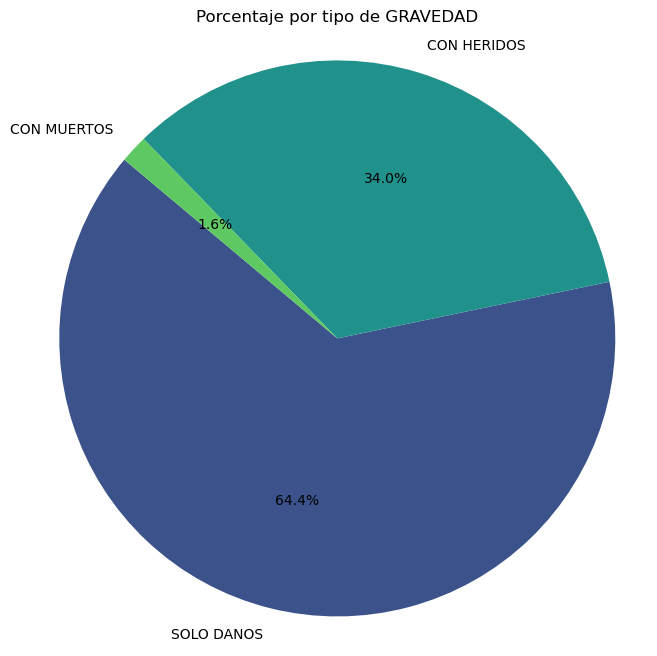

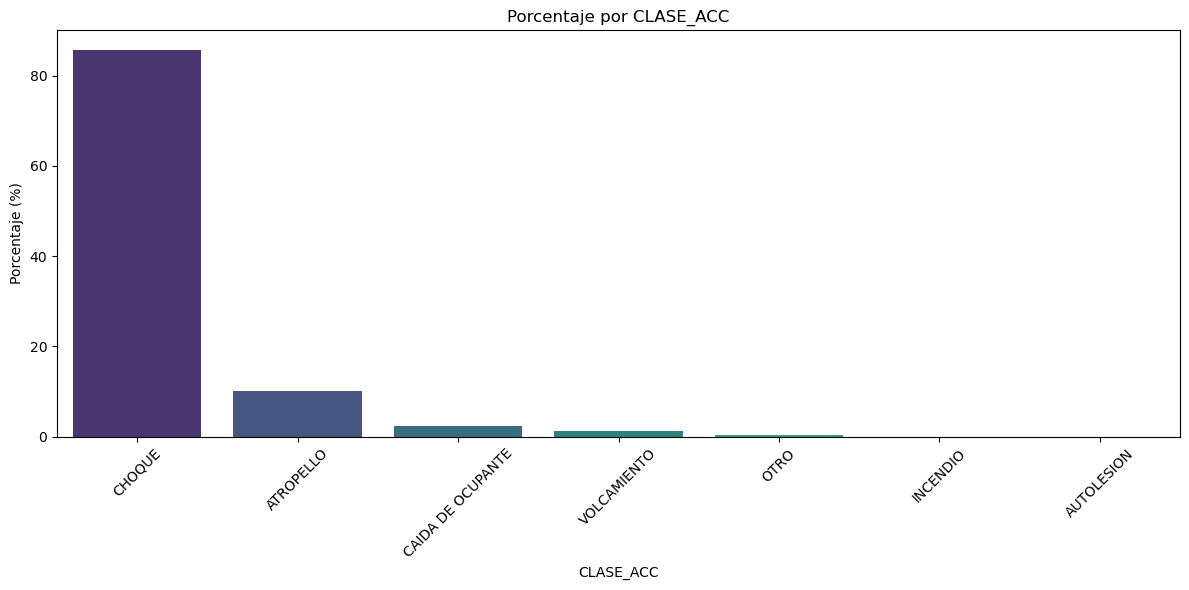

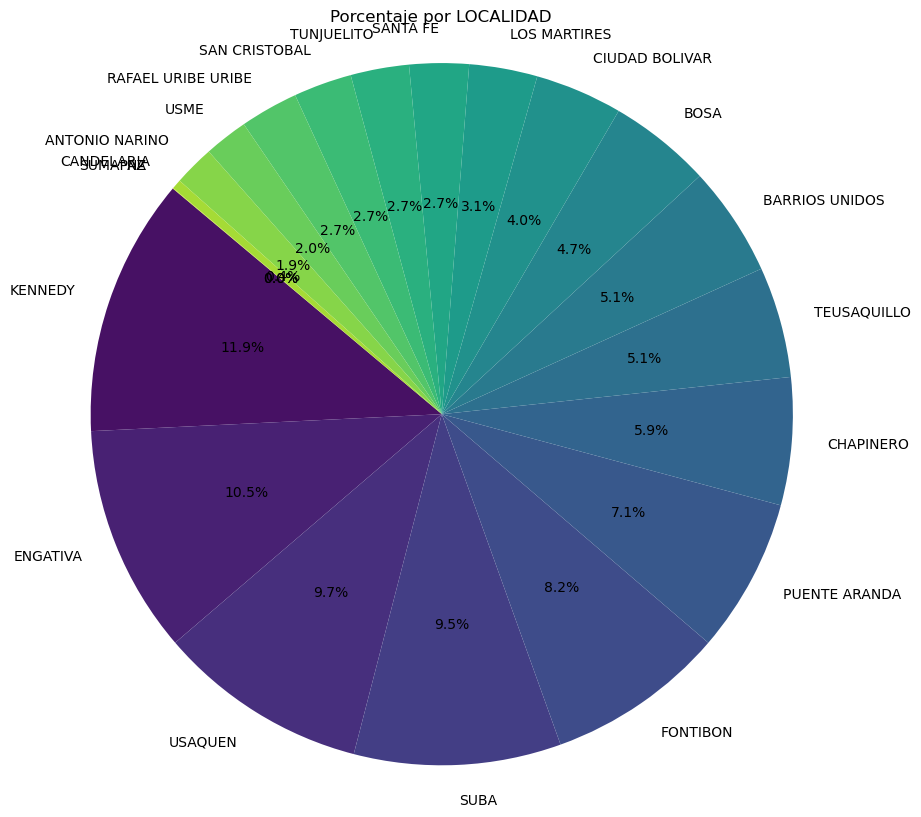

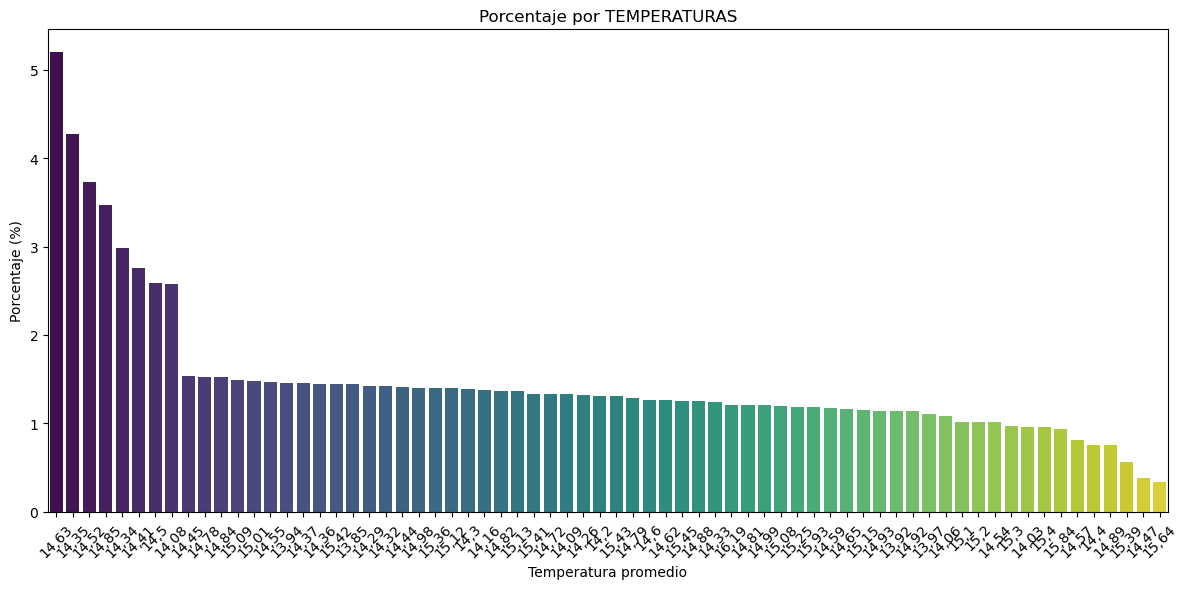

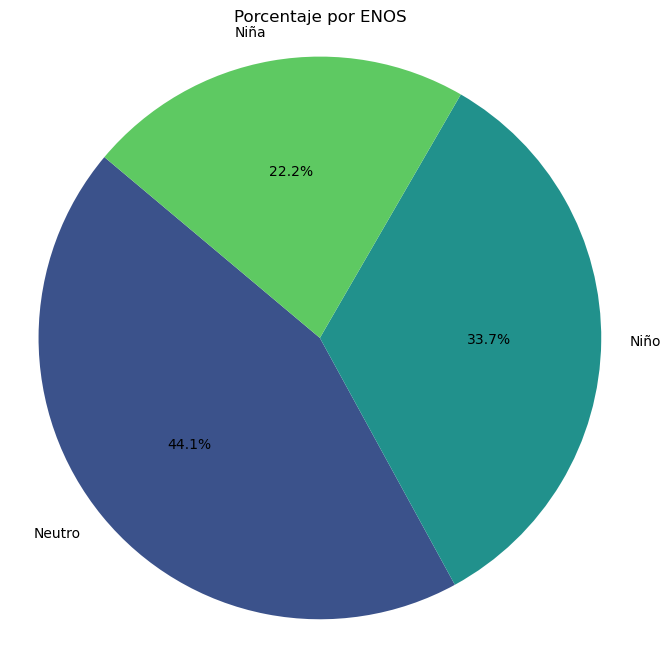

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el porcentaje por tipo de GRAVEDAD
porcentaje_gravedad = df_combinado['GRAVEDAD'].value_counts(normalize=True) * 100

# Gráfico de pastel para porcentaje por tipo de GRAVEDAD
plt.figure(figsize=(8, 8))
plt.pie(porcentaje_gravedad, labels=porcentaje_gravedad.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(porcentaje_gravedad)))
plt.title('Porcentaje por tipo de GRAVEDAD')
plt.axis('equal')
plt.show()

# Calcular el porcentaje por CLASE_ACC
porcentaje_clase_acc = df_combinado['CLASE_ACC'].value_counts(normalize=True) * 100

# Gráfico de barras para porcentaje por CLASE_ACC
plt.figure(figsize=(12, 6))
sns.barplot(x=porcentaje_clase_acc.index, y=porcentaje_clase_acc.values, palette='viridis')
plt.title('Porcentaje por CLASE_ACC')
plt.xlabel('CLASE_ACC')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calcular el porcentaje por LOCALIDAD
porcentaje_localidad = df_combinado['LOCALIDAD'].value_counts(normalize=True) * 100

# Gráfico de barras para porcentaje por LOCALIDAD
plt.figure(figsize=(10, 10))
plt.pie(porcentaje_localidad, labels=porcentaje_localidad.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(porcentaje_localidad)))
plt.title('Porcentaje por LOCALIDAD')
plt.axis('equal')
plt.show()

# Calcular el porcentaje por TEMPERATURAS
porcentaje_temperaturas = df_combinado['Temperatura promedio'].value_counts(normalize=True) * 100

# Gráfico de barras para porcentaje por TEMPERATURAS
plt.figure(figsize=(12, 6))
sns.barplot(x=porcentaje_temperaturas.index, y=porcentaje_temperaturas.values, palette='viridis')
plt.title('Porcentaje por TEMPERATURAS')
plt.xlabel('Temperatura promedio')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calcular el porcentaje por ENOS
porcentaje_enos = df_combinado['Enos '].value_counts(normalize=True) * 100

# Gráfico de pastel para porcentaje por ENOS
plt.figure(figsize=(8, 8))
plt.pie(porcentaje_enos, labels=porcentaje_enos.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(porcentaje_enos)))
plt.title('Porcentaje por ENOS')
plt.axis('equal')
plt.show()


In [10]:
# Mapeo de los nombres de los meses en español a inglés abreviado
meses_mapping = {
    'Enero': 'Jan',
    'Febrero': 'Feb',
    'Marzo': 'Mar',
    'Abril': 'Apr',
    'Mayo': 'May',
    'Junio': 'Jun',
    'Julio': 'Jul',
    'Agosto': 'Aug',
    'Septiembre': 'Sep',
    'Octubre': 'Oct',
    'Noviembre': 'Nov',
    'Diciembre': 'Dec'
}


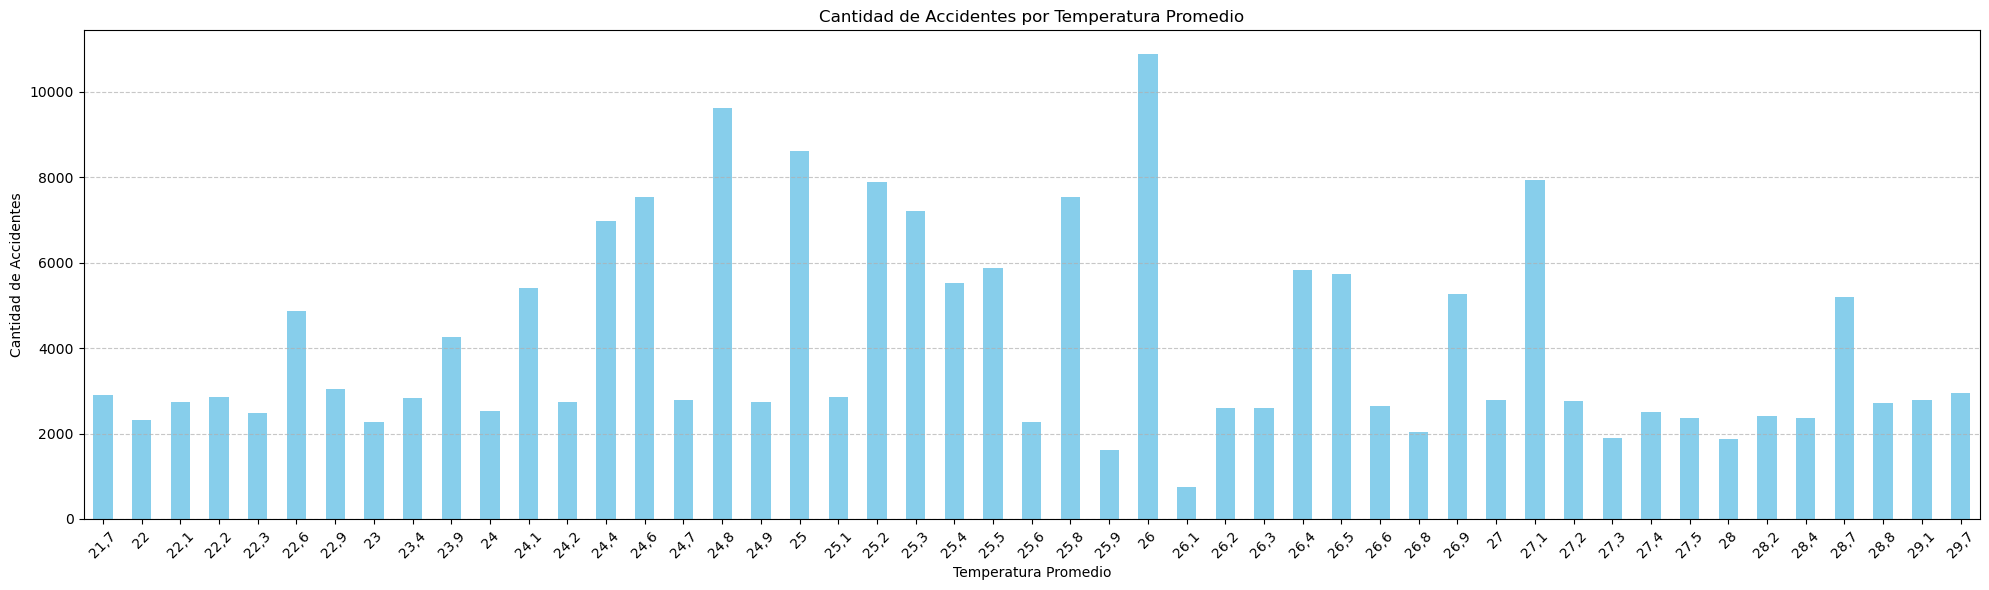

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


accidentes_por_temperatura = df_combinado.groupby('Temperatura Máxima').size()

# Graficar los recuentos de accidentes por temperatura promedio
plt.figure(figsize=(20, 6))
accidentes_por_temperatura.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Accidentes por Temperatura Promedio')
plt.xlabel('Temperatura Promedio')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

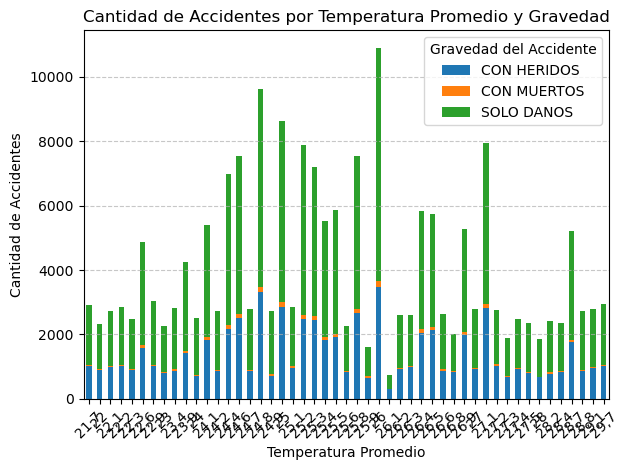

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar la cantidad de accidentes por temperatura promedio y gravedad del accidente
accidentes_por_temperatura_gravedad = df_combinado.groupby(['Temperatura Máxima', 'GRAVEDAD']).size().unstack()

plt.figure(figsize=(12, 8))
accidentes_por_temperatura_gravedad.plot(kind='bar', stacked=True)
plt.title('Cantidad de Accidentes por Temperatura Promedio y Gravedad')
plt.xlabel('Temperatura Promedio')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.legend(title='Gravedad del Accidente')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


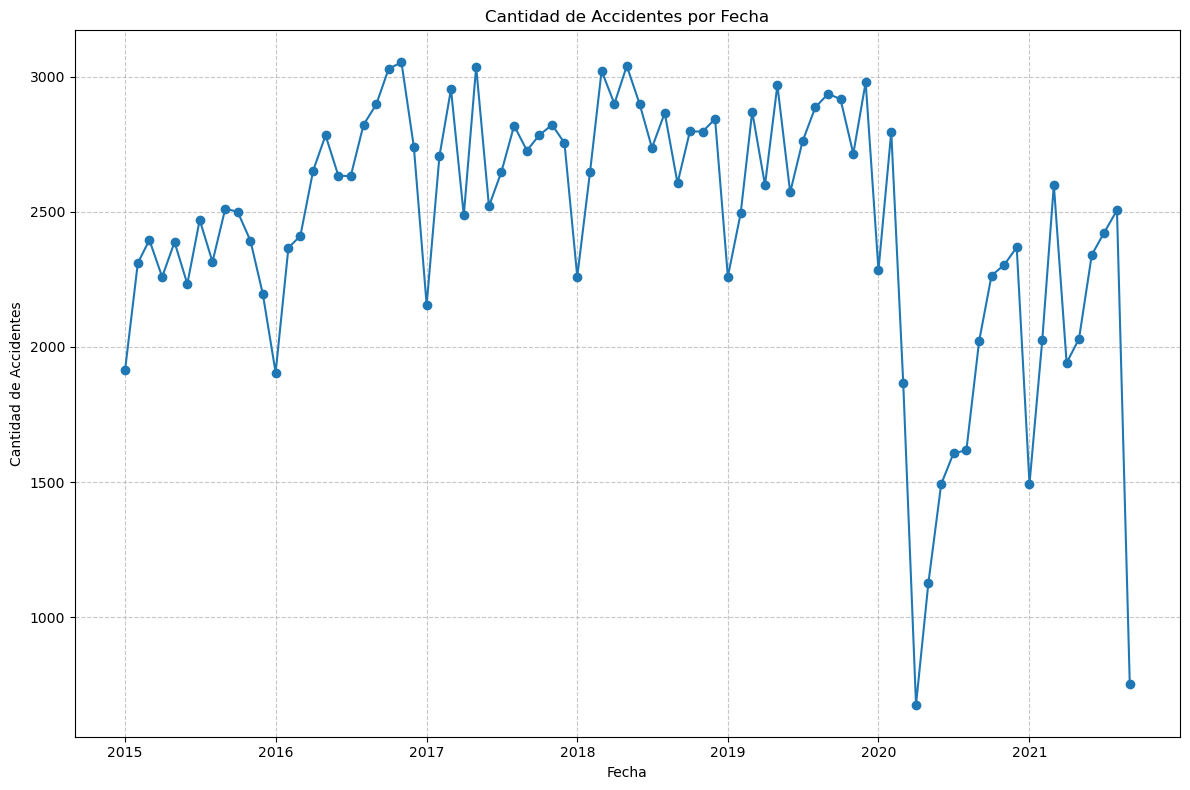

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = df_combinado


df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['Mes'].map(meses_mapping), format='%Y-%b')

# Contar la cantidad de accidentes por fecha
accidentes_por_fecha = df.groupby('Fecha').size().reset_index(name='Cantidad de Accidentes')

plt.figure(figsize=(12, 8))
plt.plot(accidentes_por_fecha['Fecha'], accidentes_por_fecha['Cantidad de Accidentes'], marker='o')
plt.title('Cantidad de Accidentes por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Accidentes')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

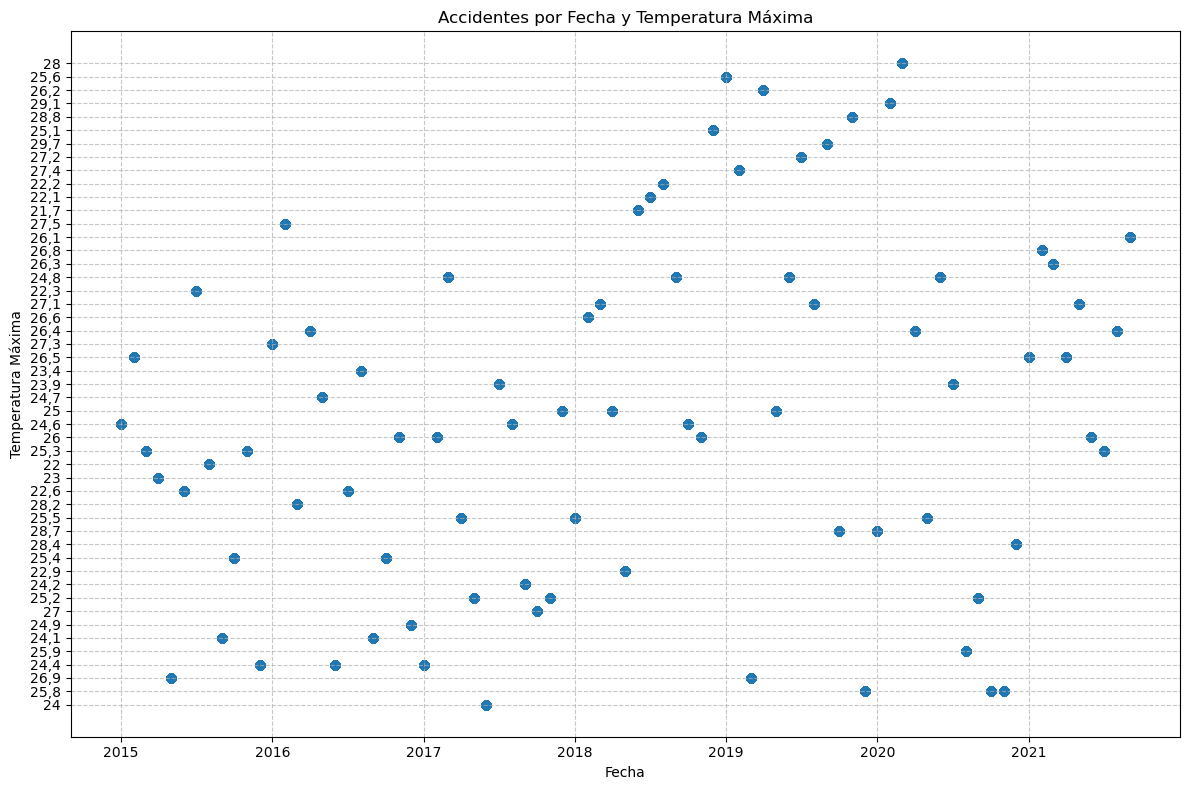

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


df = df_combinado
df['FECHA_OCURRENCIA_ACC'] = pd.to_datetime(df['FECHA_OCURRENCIA_ACC'])
df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['Mes'].map(meses_mapping), format='%Y-%b')

# Graficar los accidentes en un gráfico de dispersión
plt.figure(figsize=(12, 8))
plt.scatter(df['Fecha'], df['Temperatura Máxima'], alpha=0.5)
plt.title('Accidentes por Fecha y Temperatura Máxima')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Máxima')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

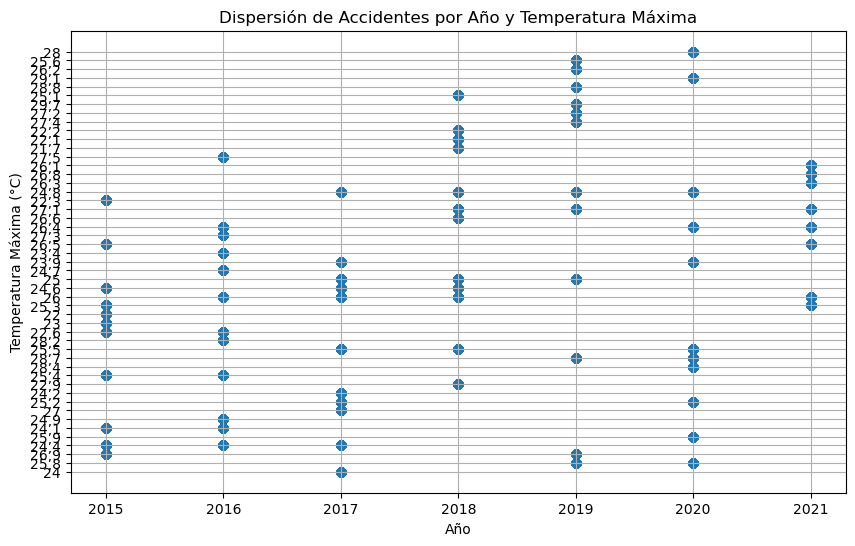

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

datos = df_combinado

plt.figure(figsize=(10, 6))
plt.scatter(datos['Año'], datos['Temperatura Máxima'], alpha=0.5)

plt.title('Dispersión de Accidentes por Año y Temperatura Máxima')
plt.xlabel('Año')
plt.ylabel('Temperatura Máxima (°C)')

plt.grid(True)
plt.show()

Cantidad de datos en x: 199146
Cantidad de datos en y: 199146


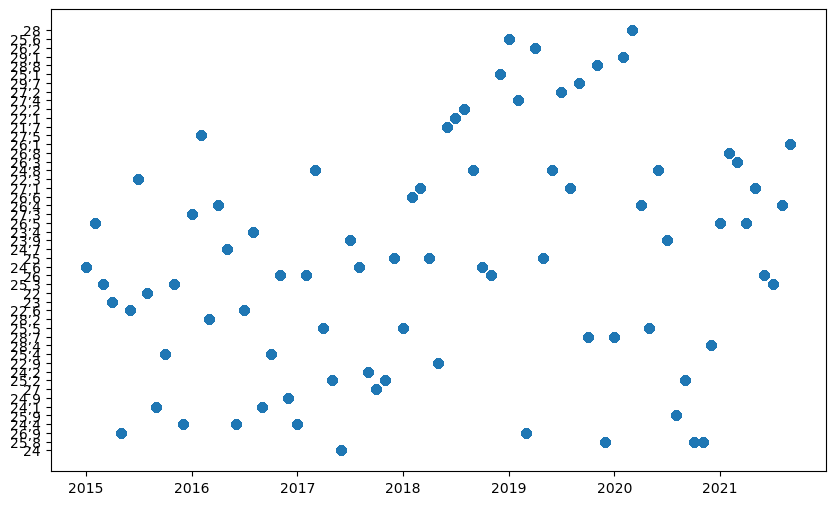

In [16]:
df = df_combinado


df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['Mes'].map(meses_mapping), format='%Y-%b')

x=df['Fecha']
y=df['Temperatura Máxima']

cantidad_datos_x = len(df['Fecha'])
cantidad_datos_y = len(df['Temperatura Máxima'])

print("Cantidad de datos en x:", cantidad_datos_x)
print("Cantidad de datos en y:", cantidad_datos_y)

plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.show()


## Correlación

C:\Users\HP\AppData\Local\Temp\ipykernel_23524\3792665746.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temperatura[col] = df_temperatura[col].apply(convert_to_float)


Temperatura Máxima      float64
Temperatura Mínima      float64
Temperatura promedio    float64
dtype: object
Matriz de correlación:
                      Temperatura Máxima  Temperatura Mínima  \
Temperatura Máxima              1.000000           -0.205681   
Temperatura Mínima             -0.205681            1.000000   
Temperatura promedio            0.603168            0.143728   

                      Temperatura promedio  
Temperatura Máxima                0.603168  
Temperatura Mínima                0.143728  
Temperatura promedio              1.000000  


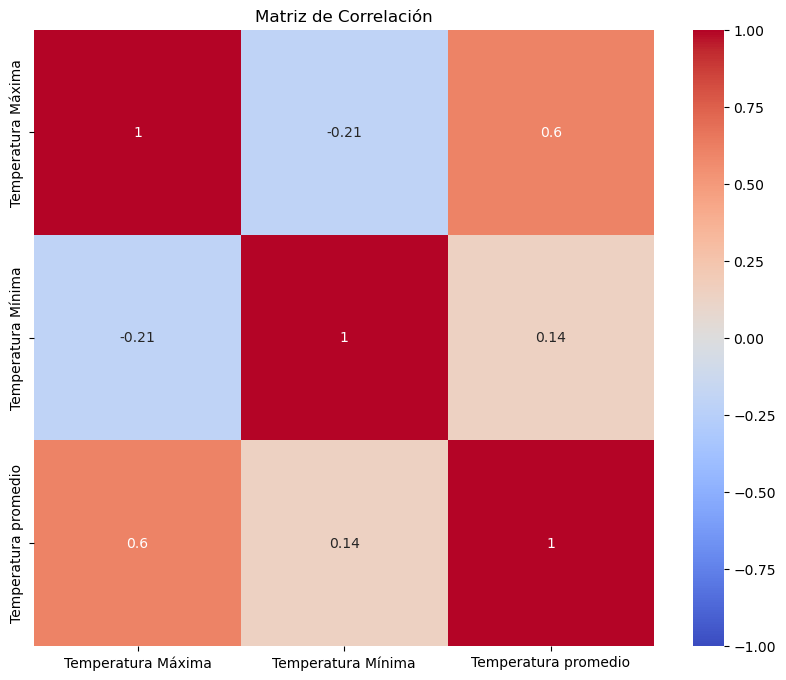

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona las columnas relevantes para el análisis de correlación
columnas_deseadas = ['Temperatura Máxima', 'Temperatura Mínima', 'Temperatura promedio']
df_temperatura = df_combinado[columnas_deseadas]

# Función para convertir cadenas de números con comas a float
def convert_to_float(x):
    try:
        return float(x.replace(',', '.'))
    except:
        return x

# Aplica la conversión a las columnas de temperatura
for col in ['Temperatura Máxima', 'Temperatura Mínima', 'Temperatura promedio']:
    df_temperatura[col] = df_temperatura[col].apply(convert_to_float)

# Verifica si hay valores no convertidos correctamente
print(df_temperatura.dtypes)

# Si hay valores que no se pudieron convertir, puedes optar por eliminarlos o reemplazarlos
df_temperatura = df_temperatura.apply(pd.to_numeric, errors='coerce')

# Ahora puedes calcular la matriz de correlación
correlation_matrix = df_temperatura.corr(method='spearman')

# Muestra la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

# Configura el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crea el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Muestra el gráfico
plt.title("Matriz de Correlación")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_23524\1968179824.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temperatura[col] = df_temperatura[col].apply(convert_to_float)


[[1.         0.95645111 0.99843535]
 [0.95645111 1.         0.96350473]
 [0.99843535 0.96350473 1.        ]]
Matriz de Similitud del Coseno:
                      Temperatura Máxima  Temperatura Mínima  \
Temperatura Máxima              1.000000            0.956451   
Temperatura Mínima              0.956451            1.000000   
Temperatura promedio            0.998435            0.963505   

                      Temperatura promedio  
Temperatura Máxima                0.998435  
Temperatura Mínima                0.963505  
Temperatura promedio              1.000000  


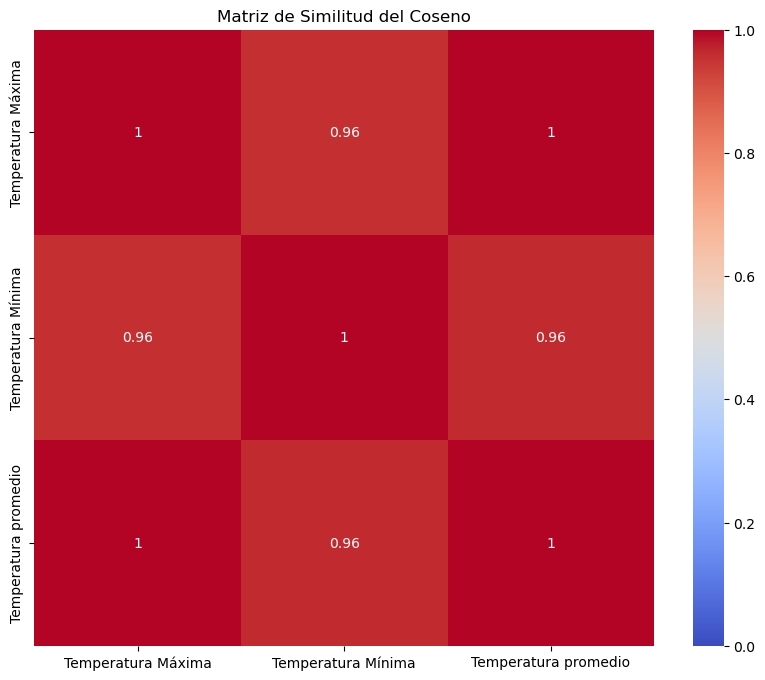

In [18]:
from sklearn.metrics.pairwise import cosine_similarity


columnas_deseadas = ['Temperatura Máxima', 'Temperatura Mínima', 'Temperatura promedio']
df_temperatura = df_combinado[columnas_deseadas]


def convert_to_float(x):
    try:
        return float(x.replace(',', '.'))
    except:
        return np.nan

for col in ['Temperatura Máxima', 'Temperatura Mínima', 'Temperatura promedio']:
    df_temperatura[col] = df_temperatura[col].apply(convert_to_float)


df_temperatura = df_temperatura.apply(pd.to_numeric, errors='coerce')
df_temperatura = df_temperatura.dropna()

# Calcular la matriz de similitud del coseno
cosine_sim_matrix = cosine_similarity(df_temperatura.T)
print(cosine_sim_matrix)
# Crear un DataFrame para visualizar la matriz de similitud
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=columnas_deseadas, columns=columnas_deseadas)

# Mostrar la matriz de similitud del coseno
print("Matriz de Similitud del Coseno:")
print(cosine_sim_df)

# Visualizar la matriz de similitud del coseno
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_df, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Matriz de Similitud del Coseno")
plt.show()

# Modelos a utilizar

* Clasificación: Árboles de decisión
* Asociación: Reglas de asociación
* Clasificación: Clustering

# Árboles de decisión

Para este proyecto, se implementó un modelo de árbol de decisión con el objetivo de clasificar la gravedad de los accidentes de tránsito. El primer paso fue la preparación de los datos. Se seleccionaron las siguientes columnas de la base de datos: Enos, GRAVEDAD, CLASE_ACC, LOCALIDAD y Temperatura promedio. Luego, se eliminaron las filas con datos faltantes para asegurar la integridad del conjunto de datos. Para manejar las variables categóricas, se utilizó LabelEncoder de la librería sklearn, transformando las columnas CLASE_ACC, Enos y LOCALIDAD en valores numéricos. 
  
La columna Temperatura promedio, originalmente en formato string, fue convertida a tipo float después de reemplazar las comas por puntos decimales, asegurando una correcta interpretación numérica. Posteriormente, el conjunto de datos fue dividido en características (X) y etiquetas (y), donde X incluía todas las columnas seleccionadas excepto GRAVEDAD, y y consistía únicamente en la columna GRAVEDAD. 
  
Para la implementación del modelo, se utilizó train_test_split para dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%). Se definió un DecisionTreeClassifier con parámetros específicos para evitar el sobreajuste: una profundidad máxima de 10 niveles, un mínimo de 500 muestras para dividir un nodo y un mínimo de 100 muestras por hoja. El modelo fue ajustado utilizando el conjunto de datos de entrenamiento, y luego se predijeron las etiquetas del conjunto de prueba. 

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


features = ['Enos ','GRAVEDAD', 'CLASE_ACC', 'LOCALIDAD','Temperatura promedio']
data = df_combinado[features]

data = data.dropna()

label_encoder = LabelEncoder()
data['CLASE_ACC'] = label_encoder.fit_transform(data['CLASE_ACC'])
data['Enos '] = label_encoder.fit_transform(data['Enos '])


# Aplica la transformación
data['LOCALIDAD'] = label_encoder.fit_transform(data['LOCALIDAD'])

transformed_labels = data['LOCALIDAD'].unique()

transformed_labels_df = pd.DataFrame({'Localidad': label_encoder.inverse_transform(transformed_labels), 
                                      'Número de Transformación': transformed_labels})


X = data.drop('GRAVEDAD', axis=1)
y = data['GRAVEDAD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train['Temperatura promedio'] = X_train['Temperatura promedio'].str.replace(',', '.').astype(float)

X_test['Temperatura promedio'] = X_test['Temperatura promedio'].str.replace(',', '.').astype(float)


model = DecisionTreeClassifier(max_depth=10,min_samples_split=500,min_samples_leaf=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7712026110971629


In [20]:
from sklearn import tree
import matplotlib.pyplot as plt


plt.figure(figsize=(350, 50))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_, fontsize=10)
plt.show()

La precisión del modelo se calculó utilizando accuracy_score, resultando en un 76.97%. Este valor indica que el modelo tiene una capacidad razonablemente buena para predecir la gravedad de los accidentes basándose en las características seleccionadas. La precisión obtenida sugiere que las características climáticas y contextuales, como la clase de accidente, la localidad y la temperatura promedio, influyen significativamente en la gravedad de los accidentes de tránsito. 
  
Este análisis proporciona una base sólida para que las autoridades puedan implementar políticas y estrategias más efectivas en la prevención y mitigación de accidentes graves. Sin embargo, la precisión del 76.97% también indica que hay margen de mejora. Factores adicionales o técnicas de preprocesamiento más avanzadas podrían ayudar a mejorar la precisión del modelo. 

# Reglas de Asociación

La evaluación se realiza contrarrestando variables del primer Dataset junto con el Dataset de temperaturas, para llegar a conclusiones acerca de las correlaciones que existen entre la accidentalidad y la temperatura en este caso. 

## Definición de Funciones para implementación de Reglas de Asociación

### Metodología

El análisis de reglas de asociación se realiza en varios pasos clave:

1. **Preparación de Datos:** Los datos se transforman utilizando un codificador de transacciones para convertir los datos categóricos en una matriz binaria adecuada para el análisis.

2. **Generación de Ítems Frecuentes:** Se aplican algoritmos como Apriori y FPGrowth para identificar conjuntos de ítems que aparecen juntos con una frecuencia superior a un umbral mínimo de soporte.

3. **Generación de Reglas de Asociación:** A partir de los ítems frecuentes, se generan reglas de asociación que cumplen con un umbral mínimo de confianza, indicando la probabilidad de que un ítem aparezca dado que otro ítem está presente.

In [212]:
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth

def prepare_data(dataset, columnas_deseadas):
    dfc2 = dataset[columnas_deseadas].astype(str)
    dfc2 = dataset[columnas_deseadas]
    dfc2_list = dfc2.values.tolist()
    te = TransactionEncoder()
    te_array = te.fit(dfc2_list).transform(dfc2_list)
    df = pd.DataFrame(te_array, columns=te.columns_)
    return df

def run_apriori(df, min_support):
    frequent_items = apriori(df, min_support=min_support, use_colnames=True)
    return frequent_items

def run_fpgrowth(df, min_support):
    frequent_items = fpgrowth(df, min_support=min_support, use_colnames=True)
    return frequent_items

def generate_association_rules(frequent_items, min_threshold):
    rules = association_rules(frequent_items, metric="confidence", min_threshold=min_threshold)
    return rules

def association_rules_pipeline(columnas_deseadas, dataset, min_support, min_threshold):
    df_prepared = prepare_data(dataset, columnas_deseadas)
    print("Data after TransactionEncoder:\n", df_prepared.head(10))
    
    # Running Apriori
    frequent_items_ap = run_apriori(df_prepared, min_support)
    print("Frequent items from Apriori:\n", frequent_items_ap)
    
    # Running FPGrowth
    frequent_items_fp = run_fpgrowth(df_prepared, min_support)
    print("Frequent items from FPGrowth:\n", frequent_items_fp)
    
    # Generating association rules for Apriori
    rules_ap = generate_association_rules(frequent_items_ap, min_threshold)
    print("Association rules from Apriori:\n", rules_ap)
    
    # Generating association rules for FPGrowth
    rules_fp = generate_association_rules(frequent_items_fp, min_threshold)
    print("Association rules from FPGrowth:\n", rules_fp)
    
    return rules_ap, rules_fp


## Enos

GRAVEDAD y ENOS: Durante períodos en los cuales se observa el fenómeno del Niño (Niño) en la zona de accidentes, hay un incremento en la cantidad de accidentes con gravedad "CON HERIDOS" en un 1.36% en comparación con períodos en los que no se observa este fenómeno. Específicamente, la probabilidad de que ocurran accidentes con gravedad "CON HERIDOS" cuando está presente el fenómeno del Niño es del 2.33%, mientras que cuando no está presente, esta probabilidad es del 2.17%. Esto sugiere una asociación débil entre la gravedad de los accidentes y la presencia del fenómeno del Niño. 
 
CLASE DE ACCIDENTE y ENOS: Las reglas de asociación encontradas muestran relaciones entre diferentes tipos de accidentes y sus consecuencias. Por ejemplo, cuando ocurre un "CHOQUE", hay una alta probabilidad de que el estado resultante sea "Neutro", con una confianza del 44.39% y un lift de 1.01. Por otro lado, la presencia de "Niño" tiene una confianza del 84.43% de llevar a un "CHOQUE", pero con un lift de 0.98, lo que indica una disminución en la probabilidad en comparación con la ocurrencia general de "CHOQUE". 
 
* CHOQUE -> Neutro: Esta regla indica que cuando ocurre un choque, hay una probabilidad del 44.39% de que el resultado sea un estado neutro. El lift de 1.01 sugiere que esta asociación es casi neutral, ya que el lift cercano a 1 indica que la ocurrencia de "Neutro" después de un "CHOQUE" es casi la misma que la ocurrencia general de "Neutro". 
  
* Neutro -> CHOQUE: Esta regla muestra que si el estado es neutro, hay una probabilidad del 86.38% de que haya ocurrido un choque. El lift de 1.01 indica que esta asociación es casi neutral, ya que el lift cercano a 1 indica que la ocurrencia de un "CHOQUE" después de un estado "Neutro" es casi la misma que la ocurrencia general de "CHOQUE". 
  
* CHOQUE -> Niña: Indica que cuando ocurre un choque, hay una probabilidad del 22.45% de que esté involucrada una niña. El lift de 1.01 sugiere que esta asociación es casi neutral, ya que el lift cercano a 1 indica que la ocurrencia de "Niña" después de un "CHOQUE" es casi la misma que la ocurrencia general de "Niña". 
  
* Niña -> CHOQUE: Muestra que si está involucrada una niña, hay una probabilidad del 86.56% de que haya ocurrido un choque. El lift de 1.01 indica que esta asociación es casi neutral, ya que el lift cercano a 1 indica que la ocurrencia de un "CHOQUE" después de una niña es casi la misma que la ocurrencia general de "CHOQUE". 
  
* CHOQUE -> Niño: Indica que cuando ocurre un choque, hay una probabilidad del 33.16% de que esté involucrado un niño. El lift de 0.98 sugiere que esta asociación tiene un efecto negativo en la ocurrencia de "Niño" después de un "CHOQUE", ya que el lift por debajo de 1 indica una disminución en la probabilidad de "Niño" después de un "CHOQUE". 
  
* Niño -> CHOQUE: Muestra que si está involucrado un niño, hay una probabilidad del 84.43% de que haya ocurrido un choque. El lift de 0.98 indica que esta asociación tiene un efecto negativo en la ocurrencia de un "CHOQUE" después de un niño, ya que el lift por debajo de 1 indica una disminución en la probabilidad de "CHOQUE" después de un niño. 
 
DIRECCIÓN y ENOS: En este caso, solamente se rescató una regla de asociación, esto ocurre, aunque el threshold y el soporte se hubieran colocado en un valor de 0.0001. Esta regla de asociación indica que cuando el lugar del accidente es en la KR 80-CL 2 51, hay una probabilidad del 53.52% de que el resultado sea un estado neutro. El lift de 1.21 sugiere que esta asociación es moderadamente relevante, ya que el lift mayor que 1 indica una mayor probabilidad de ocurrencia de "Neutro" cuando el lugar del accidente es en la KR 80-CL 2 51 en comparación con la ocurrencia general de "Neutro". Sin embargo, hay que considerar que el soporte de antecedentes es muy bajo (0.00107), lo que significa que esta regla se basa en pocos casos, lo que puede afectar la confiabilidad de la asociación encontrada. 
 
LOCALIDAD y ENOS: Para las reglas de asociación entre Dirección y ENOS, se observa que la dirección KR 80-CL 2 51 tiene una asociación con el estado del clima Neutro. Esto se refleja en una confianza del 53.52%, lo que significa que aproximadamente el 53.52% de las veces que se registra la dirección KR 80-CL 2 51, también se registra el estado del clima como Neutro. El valor de lift es mayor que 1, lo que indica que la ocurrencia de la dirección y el estado del clima es más probable juntos que por separado. 
  
Para el análisis entre localidad y ENOS, se puede notar que hay varias asociaciones significativas. Por ejemplo, se encuentra que en la localidad de Barrios Unidos, el estado del clima tiende a ser Neutro con una confianza del 44.08%. Esto significa que aproximadamente el 44.08% de las veces que se registra el estado del clima como Neutro, también se registra la localidad como Barrios Unidos. Además, el lift es cercano a 1, lo que indica una asociación neutral, sin una influencia significativa en la ocurrencia mutua de las variables. 

### Gravedad vs Enos

In [206]:
columnas_deseadas = ["GRAVEDAD","Enos "]
dataset = df_combinado
min_support = 0.1
min_threshold = 0.1

rules_ap, rules_fp = association_rules_pipeline(columnas_deseadas, dataset, min_support, min_threshold)

Data after TransactionEncoder:
    CON HERIDOS  CON MUERTOS  Neutro   Niña   Niño  SOLO DANOS
0        False        False    True  False  False        True
1         True        False    True  False  False       False
2        False        False    True  False  False        True
3        False        False   False  False   True        True
4        False        False    True  False  False        True
5        False         True    True  False  False       False
6        False        False   False  False   True        True
7        False        False    True  False  False        True
8         True        False   False  False   True       False
9         True        False   False   True  False       False
Frequent items from Apriori:
     support               itemsets
0  0.339952          (CON HERIDOS)
1  0.440752               (Neutro)
2  0.222390                 (Niña)
3  0.336858                 (Niño)
4  0.643784           (SOLO DANOS)
5  0.149383  (Neutro, CON HERIDOS)
6  0.115820

In [207]:
print(rules_ap)

print(rules_fp)

     antecedents    consequents  antecedent support  consequent support  \
0       (Neutro)  (CON HERIDOS)            0.440752            0.339952   
1  (CON HERIDOS)       (Neutro)            0.339952            0.440752   
2  (CON HERIDOS)         (Niño)            0.339952            0.336858   
3         (Niño)  (CON HERIDOS)            0.336858            0.339952   
4       (Neutro)   (SOLO DANOS)            0.440752            0.643784   
5   (SOLO DANOS)       (Neutro)            0.643784            0.440752   
6         (Niña)   (SOLO DANOS)            0.222390            0.643784   
7   (SOLO DANOS)         (Niña)            0.643784            0.222390   
8   (SOLO DANOS)         (Niño)            0.643784            0.336858   
9         (Niño)   (SOLO DANOS)            0.336858            0.643784   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.149383    0.338927  0.996987 -0.000451    0.998450      -0.005375  
1  0.149383    0.439424  0.9

### Clase de accidente vs Enos

In [52]:
columnas_deseadas = ["CLASE_ACC","Enos "]
dataset = df_combinado
min_support = 0.1
min_threshold = 0.1

rules_ap, rules_fp = association_rules_pipeline(columnas_deseadas, dataset, min_support, min_threshold)

Data after TransactionEncoder:
    ATROPELLO  AUTOLESION  CAIDA DE OCUPANTE  CHOQUE  INCENDIO  Neutro   Niña  \
0      False       False              False    True     False    True  False   
1      False       False              False   False     False    True  False   
2      False       False              False    True     False    True  False   
3      False       False              False    True     False   False  False   
4      False       False              False    True     False    True  False   
5       True       False              False   False     False    True  False   
6      False       False              False    True     False   False  False   
7      False       False              False   False     False    True  False   
8      False       False              False    True     False   False  False   
9      False       False              False    True     False   False   True   

    Niño   OTRO  VOLCAMIENTO  
0  False  False        False  
1  False   True        Fa

In [53]:
print(rules_ap)

print(rules_fp)

  antecedents consequents  antecedent support  consequent support   support  \
0    (CHOQUE)    (Neutro)            0.857672            0.440752  0.380741   
1    (Neutro)    (CHOQUE)            0.440752            0.857672  0.380741   
2    (CHOQUE)      (Niña)            0.857672            0.222390  0.192512   
3      (Niña)    (CHOQUE)            0.222390            0.857672  0.192512   
4    (CHOQUE)      (Niño)            0.857672            0.336858  0.284419   
5      (Niño)    (CHOQUE)            0.336858            0.857672  0.284419   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.443923  1.007195  0.002720    1.005703       0.050194  
1    0.863844  1.007195  0.002720    1.045325       0.012774  
2    0.224459  1.009304  0.001775    1.002668       0.064768  
3    0.865652  1.009304  0.001775    1.059397       0.011855  
4    0.331618  0.984443 -0.004495    0.992159      -0.099935  
5    0.844329  0.984443 -0.004495    0.914288      -0.023276  
  ant

### Dirección vs Enos

In [14]:
columnas_deseadas = ["DIRECCION", "Enos "]
dataset = df_combinado
min_support = 0.0005
min_threshold = 0.01

rules_ap, rules_fp = association_rules_pipeline(columnas_deseadas, dataset, min_support, min_threshold)

Data after TransactionEncoder:
    AC 0-KR 0 2  AC 01-KR 14 45  AC 01-KR 18C 02  AC 01-TR 17A 02  \
0        False           False            False            False   
1        False           False            False            False   
2        False           False            False            False   
3        False           False            False            False   
4        False           False            False            False   
5        False           False            False            False   
6        False           False            False            False   
7        False           False            False            False   
8        False           False            False            False   
9        False           False            False            False   

   AC 06-KR 24 02  AC 06-KR 26 02  AC 09-KR 108 38  AC 1  - KR 19 A  02  \
0           False           False            False                False   
1           False           False            False                Fal

In [18]:
print(rules_ap)

print(rules_fp)

       antecedents consequents  antecedent support  consequent support  \
0  (KR 80-CL 2 51)    (Neutro)             0.00107            0.440752   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.000572    0.535211  1.214314  0.000101    1.203231       0.176679  
       antecedents consequents  antecedent support  consequent support  \
0  (KR 80-CL 2 51)    (Neutro)             0.00107            0.440752   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.000572    0.535211  1.214314  0.000101    1.203231       0.176679  


### Localidad vs Enos

In [92]:
columnas_deseadas = ["LOCALIDAD", "Enos "]
dataset = df_combinado
min_support = 0.01
min_threshold = 0.01

rules_ap, rules_fp = association_rules_pipeline(columnas_deseadas, dataset, min_support, min_threshold)

Data after TransactionEncoder:
    ANTONIO NARINO  BARRIOS UNIDOS   BOSA  CANDELARIA  CHAPINERO  \
0           False           False  False       False      False   
1           False           False  False       False      False   
2           False           False  False       False      False   
3           False           False  False       False      False   
4           False           False  False       False      False   
5           False           False  False       False      False   
6           False           False  False       False      False   
7           False           False  False       False      False   
8           False           False  False       False      False   
9           False           False  False       False      False   

   CIUDAD BOLIVAR  ENGATIVA  FONTIBON  KENNEDY  LOS MARTIRES  ...  \
0           False      True     False    False         False  ...   
1           False     False     False    False         False  ...   
2           False     F

In [93]:
print(rules_ap)

print(rules_fp)

         antecedents       consequents  antecedent support  \
0           (Neutro)  (BARRIOS UNIDOS)            0.440752   
1   (BARRIOS UNIDOS)          (Neutro)            0.050686   
2             (Niña)  (BARRIOS UNIDOS)            0.222390   
3   (BARRIOS UNIDOS)            (Niña)            0.050686   
4             (Niño)  (BARRIOS UNIDOS)            0.336858   
..               ...               ...                 ...   
71            (Niño)            (SUBA)            0.336858   
72            (Niño)     (TEUSAQUILLO)            0.336858   
73     (TEUSAQUILLO)            (Niño)            0.051053   
74         (USAQUEN)            (Niño)            0.096874   
75            (Niño)         (USAQUEN)            0.336858   

    consequent support   support  confidence      lift      leverage  \
0             0.050686  0.022340    0.050687  1.000011  2.470553e-07   
1             0.440752  0.022340    0.440757  1.000011  2.470553e-07   
2             0.050686  0.011233    0.0

## Temperatura promedio

GRAVEDAD y TEMPERATURA PROMEDIO: Estas reglas de asociación muestran relaciones entre la gravedad de los accidentes de tránsito y la temperatura promedio en Bogotá. Por ejemplo, se encontró que la gravedad "SOLO DAÑOS" tiende a ocurrir con mayor frecuencia cuando la temperatura promedio es de 14,08 grados, y que la gravedad "CON HERIDOS" tiende a ocurrir con mayor frecuencia cuando la temperatura promedio es de 14,35 grados. También se observó que la gravedad "SOLO DAÑOS" tiene una asociación más fuerte con temperaturas promedio de 14,34 grados en comparación con otras temperaturas. Estas asociaciones pueden ser útiles para comprender mejor los patrones de accidentes de tránsito y para tomar medidas preventivas en función de las condiciones climáticas. 
 
CLASE y TEMPERATURA PROMEDIO: Estas reglas de asociación muestran la relación entre la clase de accidente (como "CHOQUE") y la temperatura promedio en Bogotá. Por ejemplo, se encontró que los choques tienden a ocurrir con mayor frecuencia cuando la temperatura promedio es de 14,08 grados, y que la temperatura promedio de 14,34 grados también está asociada con choques. Además, se observó que la probabilidad de choques es alta cuando la temperatura promedio es de 14,63 grados. Estas asociaciones pueden proporcionar información útil para comprender cómo la temperatura influye en los diferentes tipos de accidentes de tránsito y para implementar medidas preventivas según las condiciones climáticas. 
 
DIRECCIÓN y TEMPERATURA PROMEDIO: En dirección, aunque fue el algoritmo que más demoró en ejecutarse, con un total de 45 minutos en ejecución aproximadamente, no se obtuvieron ningunas reglas de asociación dada la variabilidad de ambos grupos de datos. 
 
LOCALIDAD y TEMPERATURA PROMEDIO: Estas reglas de asociación muestran la relación entre la localidad de Bogotá y la temperatura promedio. Por ejemplo, se encontró que en la localidad de Kennedy, los días con una temperatura promedio de 14,35 grados tienden a tener una proporción de accidentes más baja que en otros días. Por otro lado, en Engativá y Kennedy, los días con una temperatura promedio de 14,63 grados también tienen una proporción de accidentes más baja. En el caso de Usaquén, se observó que los días con una temperatura promedio de 14,63 grados tienden a tener una proporción de accidentes más alta. 
 
CLUSTERING (K-MEANS y K-NN) 
 
Finalmente, en este proyecto, utilizamos técnicas de clustering y clasificación para analizar la relación entre los accidentes de tránsito y las temperaturas en Bogotá. Empleamos los algoritmos KMeans y KNN para abordar diferentes aspectos del problema. KMeans nos permite identificar grupos naturales en los datos relacionados con la ubicación y las temperaturas de los accidentes, mientras que KNN nos ayuda a clasificar los accidentes según la gravedad, la clase de accidente y otros factores. 

### Gravedad vs Temperatura promedio

In [215]:
columnas_deseadas = ["GRAVEDAD","Temperatura promedio"]
dataset = df_combinado
min_support = 0.01
min_threshold = 0.01

rules_ap, rules_fp = association_rules_pipeline(columnas_deseadas, dataset, min_support, min_threshold)

Data after TransactionEncoder:
    13,85  13,92  13,94  13,97  14,03  14,06  14,08  14,09  14,16   14,2  ...  \
0  False  False  False  False  False  False  False  False  False  False  ...   
1  False  False  False  False  False  False  False  False  False  False  ...   
2  False  False  False  False  False  False  False  False  False  False  ...   
3  False  False  False  False  False  False  False  False  False  False  ...   
4  False  False  False  False  False  False  False  False  False  False  ...   
5  False  False  False  False  False  False  False  False  False  False  ...   
6  False  False  False  False  False  False  False  False  False  False  ...   
7  False  False  False  False  False  False  False  False  False  False  ...   
8  False  False  False  False  False  False  False  False  False  False  ...   
9  False  False  False  False  False  False  False  False  False  False  ...   

   15,42  15,43  15,45  15,64  15,84  15,93  16,19  CON HERIDOS  CON MUERTOS  \
0  Fals

In [216]:
print(rules_ap)

print(rules_fp)

      antecedents    consequents  antecedent support  consequent support  \
0         (14,08)   (SOLO DANOS)            0.025775            0.643784   
1    (SOLO DANOS)        (14,08)            0.643784            0.025775   
2    (SOLO DANOS)        (14,34)            0.643784            0.029797   
3         (14,34)   (SOLO DANOS)            0.029797            0.643784   
4   (CON HERIDOS)        (14,35)            0.339952            0.042773   
5         (14,35)  (CON HERIDOS)            0.042773            0.339952   
6    (SOLO DANOS)        (14,35)            0.643784            0.042773   
7         (14,35)   (SOLO DANOS)            0.042773            0.643784   
8    (SOLO DANOS)        (14,41)            0.643784            0.027568   
9         (14,41)   (SOLO DANOS)            0.027568            0.643784   
10        (14,45)   (SOLO DANOS)            0.015330            0.643784   
11   (SOLO DANOS)        (14,45)            0.643784            0.015330   
12         (

### Clase de accidente vs Temperatura promedio

In [68]:
columnas_deseadas = ["CLASE_ACC","Temperatura promedio"]
dataset = df_combinado
min_support = 0.02
min_threshold = 0.02

rules_ap, rules_fp = association_rules_pipeline(columnas_deseadas, dataset, min_support, min_threshold)

Data after TransactionEncoder:
    13,85  13,92  13,94  13,97  14,03  14,06  14,08  14,09  14,16   14,2  ...  \
0  False  False  False  False  False  False  False  False  False  False  ...   
1  False  False  False  False  False  False  False  False  False  False  ...   
2  False  False  False  False  False  False  False  False  False  False  ...   
3  False  False  False  False  False  False  False  False  False  False  ...   
4  False  False  False  False  False  False  False  False  False  False  ...   
5  False  False  False  False  False  False  False  False  False  False  ...   
6  False  False  False  False  False  False  False  False  False  False  ...   
7  False  False  False  False  False  False  False  False  False  False  ...   
8  False  False  False  False  False  False  False  False  False  False  ...   
9  False  False  False  False  False  False  False  False  False  False  ...   

   15,84  15,93  16,19  ATROPELLO  AUTOLESION  CAIDA DE OCUPANTE  CHOQUE  \
0  False  F

In [69]:
print(rules_ap)

print(rules_fp)

   antecedents consequents  antecedent support  consequent support   support  \
0     (CHOQUE)     (14,08)            0.857672            0.025775  0.021668   
1      (14,08)    (CHOQUE)            0.025775            0.857672  0.021668   
2     (CHOQUE)     (14,34)            0.857672            0.029797  0.026031   
3      (14,34)    (CHOQUE)            0.029797            0.857672  0.026031   
4     (CHOQUE)     (14,35)            0.857672            0.042773  0.036521   
5      (14,35)    (CHOQUE)            0.042773            0.857672  0.036521   
6     (CHOQUE)     (14,41)            0.857672            0.027568  0.023330   
7      (14,41)    (CHOQUE)            0.027568            0.857672  0.023330   
8     (CHOQUE)      (14,5)            0.857672            0.025926  0.022797   
9       (14,5)    (CHOQUE)            0.025926            0.857672  0.022797   
10     (14,52)    (CHOQUE)            0.037294            0.857672  0.031987   
11    (CHOQUE)     (14,52)            0.

### Dirección vs Temperatura promedio

In [58]:
columnas_deseadas = ["DIRECCION","Temperatura promedio"]
dataset = df_combinado
min_support = 0.005
min_threshold = 0.005

rules_ap, rules_fp = association_rules_pipeline(columnas_deseadas, dataset, min_support, min_threshold)

Data after TransactionEncoder:
    13,85  13,92  13,94  13,97  14,03  14,06  14,08  14,09  14,16   14,2  ...  \
0  False  False  False  False  False  False  False  False  False  False  ...   
1  False  False  False  False  False  False  False  False  False  False  ...   
2  False  False  False  False  False  False  False  False  False  False  ...   
3  False  False  False  False  False  False  False  False  False  False  ...   
4  False  False  False  False  False  False  False  False  False  False  ...   
5  False  False  False  False  False  False  False  False  False  False  ...   
6  False  False  False  False  False  False  False  False  False  False  ...   
7  False  False  False  False  False  False  False  False  False  False  ...   
8  False  False  False  False  False  False  False  False  False  False  ...   
9  False  False  False  False  False  False  False  False  False  False  ...   

   TV 96  - CL 80  02  TV 96 - DG 53 51  TV 96 A A - CL 75 D  10  \
0               Fal

In [59]:
print(rules_ap)

print(rules_fp)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


### Localidad vs Temperatura promedio

In [218]:
columnas_deseadas = ["LOCALIDAD","Temperatura promedio"]
dataset = df_combinado
min_support = 0.005
min_threshold = 0.005

rules_ap, rules_fp = association_rules_pipeline(columnas_deseadas, dataset, min_support, min_threshold)

Data after TransactionEncoder:
    13,85  13,92  13,94  13,97  14,03  14,06  14,08  14,09  14,16   14,2  ...  \
0  False  False  False  False  False  False  False  False  False  False  ...   
1  False  False  False  False  False  False  False  False  False  False  ...   
2  False  False  False  False  False  False  False  False  False  False  ...   
3  False  False  False  False  False  False  False  False  False  False  ...   
4  False  False  False  False  False  False  False  False  False  False  ...   
5  False  False  False  False  False  False  False  False  False  False  ...   
6  False  False  False  False  False  False  False  False  False  False  ...   
7  False  False  False  False  False  False  False  False  False  False  ...   
8  False  False  False  False  False  False  False  False  False  False  ...   
9  False  False  False  False  False  False  False  False  False  False  ...   

   PUENTE ARANDA  RAFAEL URIBE URIBE  SAN CRISTOBAL  SANTA FE   SUBA  SUMAPAZ  \
0     

In [219]:
print(rules_ap)

print(rules_fp)

  antecedents consequents  antecedent support  consequent support   support  \
0   (KENNEDY)     (14,35)            0.118812            0.042773  0.005072   
1     (14,35)   (KENNEDY)            0.042773            0.118812  0.005072   
2  (ENGATIVA)     (14,63)            0.105089            0.051987  0.005428   
3     (14,63)  (ENGATIVA)            0.051987            0.105089  0.005428   
4   (KENNEDY)     (14,63)            0.118812            0.051987  0.005940   
5     (14,63)   (KENNEDY)            0.051987            0.118812  0.005940   
6   (USAQUEN)     (14,63)            0.096874            0.051987  0.005333   
7     (14,63)   (USAQUEN)            0.051987            0.096874  0.005333   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.042686  0.997981 -0.000010    0.999910      -0.002291  
1    0.118572  0.997981 -0.000010    0.999728      -0.002109  
2    0.051653  0.993581 -0.000035    0.999648      -0.007167  
3    0.104414  0.993581 -0.000035   

# Clustering

Finalmente, en este proyecto, utilizamos técnicas de clustering y clasificación para analizar la relación entre los accidentes de tránsito y las temperaturas en Bogotá. Empleamos los algoritmos KMeans y KNN para abordar diferentes aspectos del problema. KMeans nos permite identificar grupos naturales en los datos relacionados con la ubicación y las temperaturas de los accidentes, mientras que KNN nos ayuda a clasificar los accidentes según la gravedad, la clase de accidente y otros factores. 

## K-means

Para el análisis de clustering con KMeans, seleccionamos las columnas de 'LATITUD', 'LONGITUD', 'Temperatura Máxima', 'Temperatura Mínima' y 'Temperatura promedio' del DataFrame combinado. Convertimos las columnas de temperatura de cadenas a flotantes y eliminamos las filas con valores faltantes. Aplicamos la Regla del Codo para determinar el número óptimo de clusters y luego aplicamos KMeans con seis clusters. Añadimos las etiquetas de los clusters al DataFrame y visualizamos los clusters y los centroides en un gráfico. Sin embargo, observamos que los clusters no clasificaron bien los accidentes según la localidad, indicando una posible inefectividad del modelo en este contexto específico. 
  
El análisis de clustering con KMeans aplicado a los datos de accidentes de tránsito en Bogotá, basado en la latitud, longitud y temperaturas (máxima, mínima y promedio), ha arrojado resultados que no son completamente satisfactorios en términos de la identificación de patrones claros de clasificación según la localidad. A continuación, se detallan las conclusiones principales: 
  
Se realizó la conversión de las columnas de temperatura de cadenas de texto a flotantes, asegurando que todos los valores fueran numéricos. Se eliminaron las filas con valores NaN para evitar errores en los cálculos de similitud, garantizando así la integridad de los datos utilizados en el modelo. 
  
Se utilizó la Regla del Codo para determinar el número óptimo de clusters, probando valores de k desde 1 hasta 10. La gráfica resultante mostró una disminución pronunciada en la inercia al aumentar el número de clusters, con una estabilización a partir de k=6. Este análisis visual ayudó a seleccionar un número adecuado de clusters para el modelo KMeans. 

/var/folders/vp/0pp1wzv56gx3ktw0vtsq16m00000gn/T/ipykernel_4248/4118230802.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temperatura_accidentes[col] = df_temperatura_accidentes[col].apply(convert_to_float)


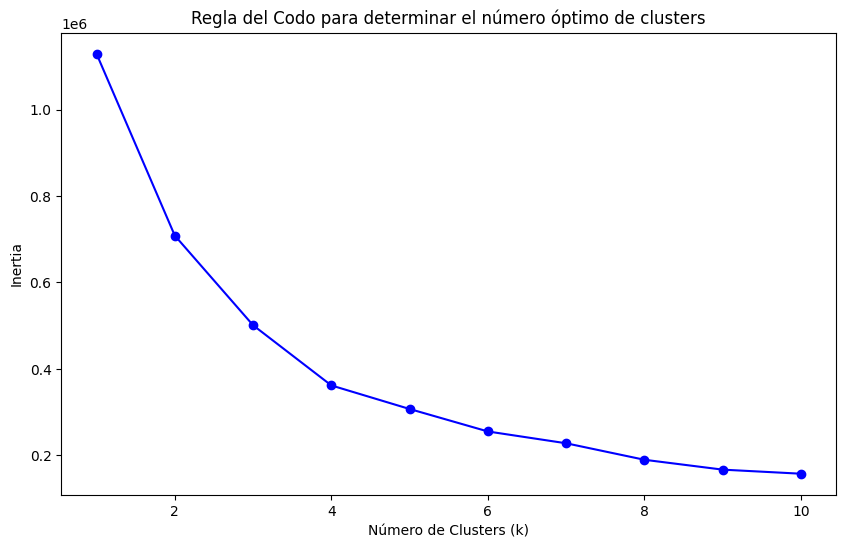

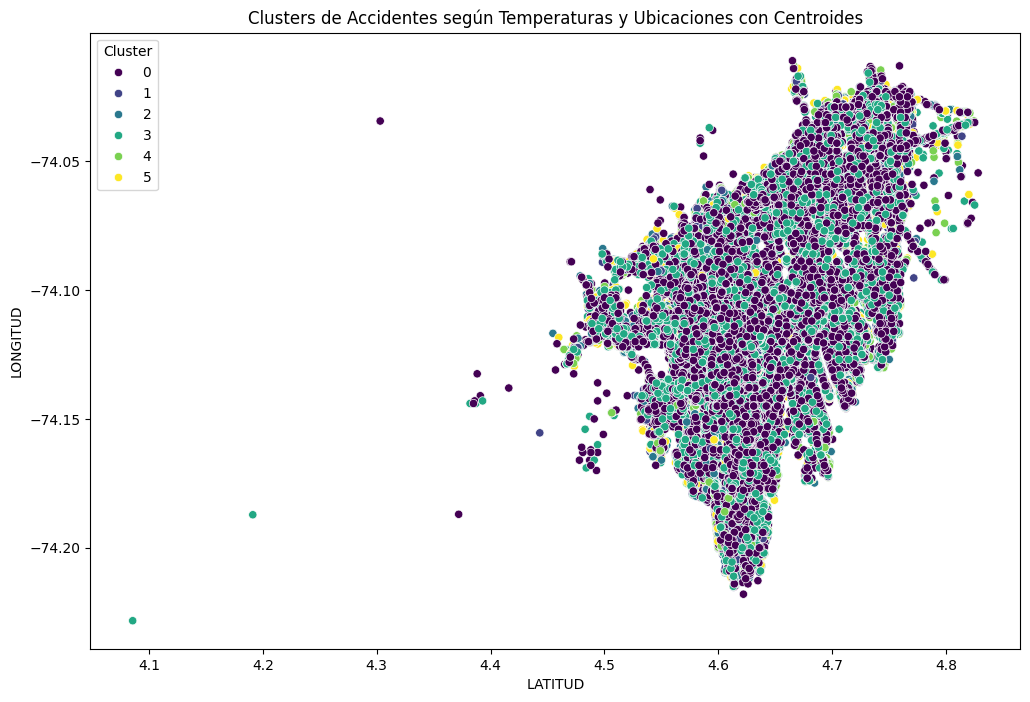

Inertia: 255462.97556365607


In [217]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya has cargado y preprocesado tu DataFrame df_combinado
columnas_deseadas = ['LATITUD', 'LONGITUD', 'Temperatura Máxima', 'Temperatura Mínima', 'Temperatura promedio']
df_temperatura_accidentes = df_combinado[columnas_deseadas]

# Convierte las columnas de temperatura de cadenas a flotantes
def convert_to_float(x):
    try:
        return float(x.replace(',', '.'))
    except:
        return np.nan

for col in ['Temperatura Máxima', 'Temperatura Mínima', 'Temperatura promedio']:
    df_temperatura_accidentes[col] = df_temperatura_accidentes[col].apply(convert_to_float)

# Asegúrate de que todos los valores sean numéricos y reemplaza valores no convertibles con NaN
df_temperatura_accidentes = df_temperatura_accidentes.apply(pd.to_numeric, errors='coerce')

# Elimina filas con valores NaN para evitar errores en el cálculo de similitud
df_temperatura_accidentes = df_temperatura_accidentes.dropna()

# Aplicar la Regla del Codo
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_temperatura_accidentes)
    inertia.append(kmeans.inertia_)

# Graficar la Regla del Codo
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inertia')
plt.title('Regla del Codo para determinar el número óptimo de clusters')
plt.show()

# Aplicar KMeans con el número óptimo de clusters (por ejemplo, 3)
kmeans_optimo = KMeans(n_clusters=6, random_state=0)
kmeans_optimo.fit(df_temperatura_accidentes)

# Añadir las etiquetas de los clusters al DataFrame
df_temperatura_accidentes['Cluster'] = kmeans_optimo.labels_

# Graficar los clusters y los centroides
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_temperatura_accidentes, x='LATITUD', y='LONGITUD', hue='Cluster', palette='viridis')

# Añadir los centroides al gráfico
centroides = kmeans_optimo.cluster_centers_
plt.title("Clusters de Accidentes según Temperaturas y Ubicaciones con Centroides")
plt.show()

# Evaluar el modelo
print(f'Inertia: {kmeans_optimo.inertia_}')


El modelo KMeans se aplicó con k=6 clusters, distribuyendo los datos de accidentes de tránsito en seis grupos distintos. Los resultados del clustering se visualizaron en un gráfico de dispersión de latitud y longitud, coloreados según los clusters asignados. 
  
La evaluación del modelo mostró una inercia de 255462.97556365607, lo que indica la suma de las distancias al cuadrado entre cada punto y su centroide correspondiente. Sin embargo, la visualización del gráfico reveló que los clusters no se alinean claramente con las localidades de Bogotá. Esto sugiere que los clusters formados por el modelo no representan adecuadamente la distribución geográfica de los accidentes según las localidades. 

## K-NN

Para el análisis de clasificación con KNN, utilizamos tres modelos diferentes, cada uno enfocado en clasificar los accidentes en base a diferentes características. Seleccionamos columnas como 'Temperatura Máxima', 'Temperatura Mínima', 'Temperatura promedio', 'GRAVEDAD', 'CLASE_ACC' y 'LOCALIDAD' para entrenar y evaluar los modelos. Convertimos las variables categóricas a numéricas usando LabelEncoder y dividimos los datos en conjuntos de entrenamiento y prueba. Entrenamos los modelos KNN y evaluamos su desempeño utilizando métricas como la precisión, el informe de clasificación y la matriz de confusión. A través de estos análisis, buscamos entender mejor cómo las condiciones climáticas y otros factores influyen en la ocurrencia y gravedad de los accidentes de tránsito en Bogotá. 

Accuracy: 0.7323625407983931
Classification Report:
               precision    recall  f1-score   support

 CON HERIDOS       0.71      0.44      0.54     13590
 CON MUERTOS       0.01      0.01      0.01       677
  SOLO DANOS       0.75      0.91      0.82     25563

    accuracy                           0.73     39830
   macro avg       0.49      0.45      0.46     39830
weighted avg       0.72      0.73      0.71     39830



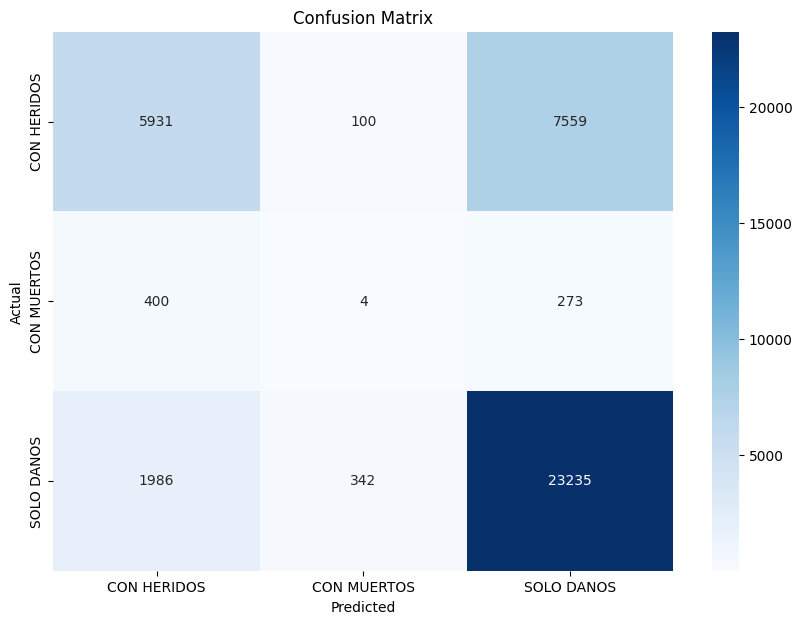

Mean Accuracy: 0.7086606271184156
Standard Deviation of Accuracy: 0.050907453269781376


In [136]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya has cargado y preprocesado tu DataFrame df_combinado
columnas_deseadas = ['Temperatura Máxima', 'Temperatura Mínima', 'Temperatura promedio', 'GRAVEDAD', 'CLASE_ACC']
df_temperatura_accidentes = df_combinado[columnas_deseadas].copy()

# Convertir las columnas de temperatura de cadenas a flotantes
def convert_to_float(x):
    try:
        return float(x.replace(',', '.'))
    except:
        return np.nan

for col in ['Temperatura Máxima', 'Temperatura Mínima', 'Temperatura promedio']:
    df_temperatura_accidentes[col] = df_temperatura_accidentes[col].apply(convert_to_float)

# Convertir las variables categóricas a numéricas
le_gravedad = LabelEncoder()
df_temperatura_accidentes['GRAVEDAD'] = le_gravedad.fit_transform(df_temperatura_accidentes['GRAVEDAD'])

le_clase_acc = LabelEncoder()
df_temperatura_accidentes['CLASE_ACC'] = le_clase_acc.fit_transform(df_temperatura_accidentes['CLASE_ACC'])

# Separar las características (X) y el objetivo (y)
X = df_temperatura_accidentes[['Temperatura Máxima', 'Temperatura Mínima', 'Temperatura promedio', 'CLASE_ACC']]
y = df_temperatura_accidentes['GRAVEDAD']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

# Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos
knn.fit(X_train, y_train)

# Realizar predicciones
y_pred = knn.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le_gravedad.classes_))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le_gravedad.classes_, yticklabels=le_gravedad.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Entrenar y evaluar el modelo con validación cruzada
knn = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos
scores = cross_val_score(knn, X, y, cv=5)  # cv=5 indica 5 particiones para la validación cruzada

print("Mean Accuracy:", scores.mean())
print("Standard Deviation of Accuracy:", scores.std())


Primer modelo: El modelo de K-Nearest Neighbors (KNN) entrenado para predecir la gravedad de los accidentes de tránsito basado en las temperaturas máximas, mínimas, promedio, y la clase de accidente muestra una precisión general del 73.24%. Sin embargo, el desempeño del modelo varía considerablemente entre las diferentes clases de gravedad de los accidentes. El modelo tiene una precisión aceptable para predecir accidentes que resultan en "SOLO DAÑOS", con una precisión del 75% y un recall del 91%, lo que indica que el modelo es bueno para identificar correctamente la mayoría de estos casos. 
  
En contraste, la precisión y el recall para los accidentes "CON HERIDOS" son moderadamente bajos, con valores de 71% y 44% respectivamente. Esto sugiere que el modelo tiene dificultades para identificar correctamente los accidentes que resultan en heridos, con una alta tasa de falsos negativos en esta categoría. La situación es más crítica para los accidentes "CON MUERTOS", donde la precisión y el recall son extremadamente bajos (1% cada uno), evidenciando que el modelo no es capaz de predecir adecuadamente estos eventos, probablemente debido al desbalance significativo de clases en los datos, donde los casos de accidentes con muertes son significativamente menos frecuentes. 
  
La validación cruzada arroja una precisión promedio del 70.87% con una desviación estándar del 5.09%, lo que indica que el modelo tiene un rendimiento relativamente estable, pero sufre de variabilidad que podría mejorarse con un ajuste más fino de los hiperparámetros. Además, la matriz de confusión confirma que el modelo tiene una fuerte tendencia a predecir accidentes "SOLO DAÑOS" correctamente, mientras que confunde frecuentemente los accidentes "CON HERIDOS" y "CON MUERTOS". 

Accuracy: 0.8374592016068291
Classification Report:
                    precision    recall  f1-score   support

        ATROPELLO       0.32      0.19      0.24      4013
       AUTOLESION       0.00      0.00      0.00         2
CAIDA DE OCUPANTE       0.06      0.01      0.02       951
           CHOQUE       0.88      0.95      0.91     34153
         INCENDIO       0.00      0.00      0.00         5
             OTRO       0.00      0.00      0.00       146
      VOLCAMIENTO       0.04      0.01      0.02       560

         accuracy                           0.84     39830
        macro avg       0.19      0.17      0.17     39830
     weighted avg       0.79      0.84      0.81     39830



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

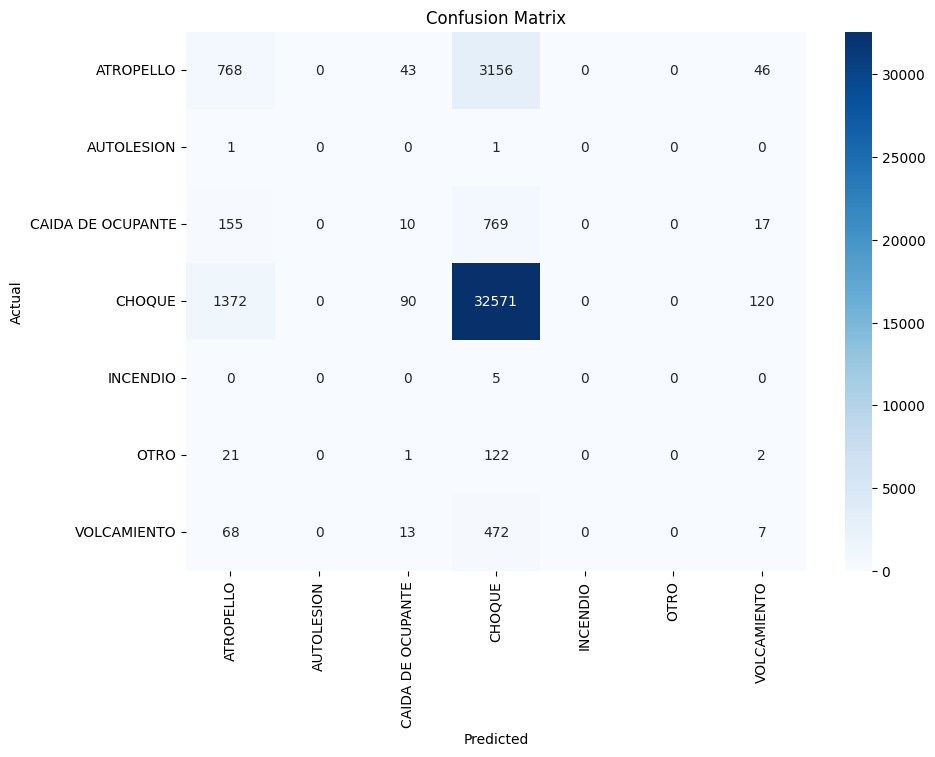

Mean Accuracy: 0.8066344338844946
Standard Deviation of Accuracy: 0.011570526910777782


In [150]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya has cargado y preprocesado tu DataFrame df_combinado
columnas_deseadas = ['Temperatura Máxima', 'Temperatura Mínima', 'Temperatura promedio', 'GRAVEDAD', 'CLASE_ACC']
df_temperatura_accidentes = df_combinado[columnas_deseadas].copy()

# Convertir las columnas de temperatura de cadenas a flotantes
def convert_to_float(x):
    try:
        return float(x.replace(',', '.'))
    except:
        return np.nan

for col in ['Temperatura Máxima', 'Temperatura Mínima', 'Temperatura promedio']:
    df_temperatura_accidentes[col] = df_temperatura_accidentes[col].apply(convert_to_float)

# Convertir las variables categóricas a numéricas
le_gravedad = LabelEncoder()
df_temperatura_accidentes['GRAVEDAD'] = le_gravedad.fit_transform(df_temperatura_accidentes['GRAVEDAD'])

le_clase_acc = LabelEncoder()
df_temperatura_accidentes['CLASE_ACC'] = le_clase_acc.fit_transform(df_temperatura_accidentes['CLASE_ACC'])

# Separar las características (X) y el objetivo (y)
X = df_temperatura_accidentes[['Temperatura Máxima', 'Temperatura Mínima', 'Temperatura promedio', 'GRAVEDAD']]
y = df_temperatura_accidentes['CLASE_ACC']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

# Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos
knn.fit(X_train, y_train)

# Realizar predicciones
y_pred = knn.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le_clase_acc.classes_))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le_clase_acc.classes_, yticklabels=le_clase_acc.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Entrenar y evaluar el modelo con validación cruzada
knn = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos
scores = cross_val_score(knn, X, y, cv=5)  # cv=5 indica 5 particiones para la validación cruzada

print("Mean Accuracy:", scores.mean())
print("Standard Deviation of Accuracy:", scores.std())

Segundo modelo: El modelo K-Nearest Neighbors (KNN) entrenado para predecir la clase de accidente de tránsito basado en las temperaturas máximas, mínimas, promedio y la gravedad del accidente demuestra una precisión general del 83.75%. Este rendimiento general sugiere que el modelo es razonablemente preciso en la clasificación de los tipos de accidentes de tránsito. 
  
El desempeño del modelo varía significativamente entre las diferentes clases de accidentes. Por ejemplo, el modelo tiene un alto desempeño en la predicción de accidentes de tipo "Choque", con una precisión del 88%, un recall del 95% y un f1-score del 91%. Esta alta precisión y recall indican que el modelo es muy efectivo en la identificación de choques, lo cual es esperable dado que los choques representan la mayoría de los casos en el conjunto de datos. 
  
Sin embargo, el modelo presenta un rendimiento notablemente bajo en la predicción de otras clases de accidentes, como "Atropello" y "Caída de Ocupante", con f1-scores de 0.24 y 0.02 respectivamente. La baja precisión y recall en estas categorías sugieren que el modelo tiene dificultades para distinguir adecuadamente entre estos tipos de accidentes, posiblemente debido a la menor cantidad de datos disponibles para estas clases en comparación con los choques. 
  
La clase "Autolesion", "Incendio", y "Otro" tienen una representación mínima en el conjunto de datos, lo que se refleja en f1-scores de 0.00. Esto indica que el modelo no puede predecir estos tipos de accidentes con precisión debido a la falta de datos suficientes para entrenar el modelo de manera efectiva en estas categorías. 
  
La validación cruzada muestra una precisión promedio del 80.66% con una desviación estándar del 1.16%, lo que indica que el modelo tiene un rendimiento relativamente consistente en diferentes particiones del conjunto de datos. La baja desviación estándar sugiere que la precisión del modelo es estable, aunque la precisión general podría mejorarse. 
  
La matriz de confusión confirma que el modelo predice correctamente la mayoría de los choques, pero tiene dificultades significativas para predecir otros tipos de accidentes. La alta precisión en la categoría de choques sugiere que el modelo es eficaz en la predicción de la clase de accidente más frecuente, pero las clases menos representadas necesitan una mayor atención y posiblemente más datos para mejorar el rendimiento del modelo en esas áreas. 

Accuracy: 0.8400451920662817
Classification Report:
                     precision    recall  f1-score   support

    ANTONIO NARINO       0.64      0.67      0.65       717
    BARRIOS UNIDOS       0.81      0.86      0.84      1984
              BOSA       0.82      0.84      0.83      1915
        CANDELARIA       0.53      0.47      0.50       159
         CHAPINERO       0.80      0.86      0.83      2338
    CIUDAD BOLIVAR       0.80      0.73      0.76      1694
          ENGATIVA       0.85      0.89      0.87      4138
          FONTIBON       0.88      0.92      0.90      3146
           KENNEDY       0.89      0.90      0.89      4754
      LOS MARTIRES       0.72      0.75      0.73      1263
                NA       0.00      0.00      0.00        10
     PUENTE ARANDA       0.85      0.85      0.85      2890
RAFAEL URIBE URIBE       0.72      0.74      0.73      1067
     SAN CRISTOBAL       0.70      0.63      0.66      1086
          SANTA FE       0.75      0.71      0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

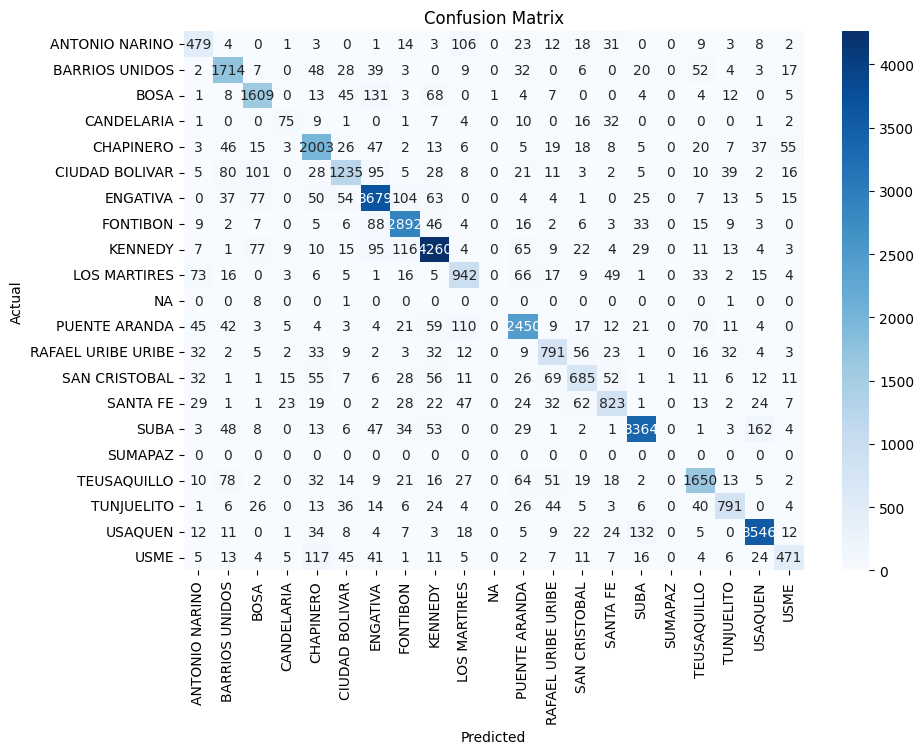

Mean Accuracy: 0.796470595072872
Standard Deviation of Accuracy: 0.12015096456835002


In [211]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya has cargado y preprocesado tu DataFrame df_combinado
columnas_deseadas = ['Temperatura Máxima', 'Temperatura Mínima', 'Temperatura promedio', 'GRAVEDAD', 'CLASE_ACC', 'LOCALIDAD', 'DIRECCION']
df_temperatura_accidentes = df_combinado[columnas_deseadas].copy()

# Convertir las columnas de temperatura de cadenas a flotantes
def convert_to_float(x):
    try:
        return float(x.replace(',', '.'))
    except:
        return np.nan

for col in ['Temperatura Máxima', 'Temperatura Mínima', 'Temperatura promedio']:
    df_temperatura_accidentes[col] = df_temperatura_accidentes[col].apply(convert_to_float)

# Convertir las variables categóricas a numéricas
le_gravedad = LabelEncoder()
df_temperatura_accidentes['GRAVEDAD'] = le_gravedad.fit_transform(df_temperatura_accidentes['GRAVEDAD'])

le_clase_acc = LabelEncoder()
df_temperatura_accidentes['CLASE_ACC'] = le_clase_acc.fit_transform(df_temperatura_accidentes['CLASE_ACC'])

le_localidad = LabelEncoder()
df_temperatura_accidentes['LOCALIDAD'] = le_localidad.fit_transform(df_temperatura_accidentes['LOCALIDAD'])

la_direccion = LabelEncoder()
df_temperatura_accidentes['DIRECCION'] = la_direccion.fit_transform(df_temperatura_accidentes['DIRECCION'])

# Separar las características (X) y el objetivo (y)
X = df_temperatura_accidentes[['Temperatura Máxima', 'Temperatura Mínima', 'Temperatura promedio', 'GRAVEDAD', 'CLASE_ACC', 'DIRECCION']]
y = df_temperatura_accidentes['LOCALIDAD']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

# Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos
knn.fit(X_train, y_train)

# Realizar predicciones
y_pred = knn.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le_localidad.classes_))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le_localidad.classes_, yticklabels=le_localidad.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Entrenar y evaluar el modelo con validación cruzada
knn = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos
scores = cross_val_score(knn, X, y, cv=5)  # cv=5 indica 5 particiones para la validación cruzada

print("Mean Accuracy:", scores.mean())
print("Standard Deviation of Accuracy:", scores.std())

Tercer modelo: El modelo K-Nearest Neighbors (KNN) entrenado para predecir la localidad de los accidentes de tránsito basado en las temperaturas máximas, mínimas, promedio, la gravedad del accidente, la clase de accidente y la dirección demuestra una precisión general del 84%. El rendimiento indica que el modelo es preciso para identificar la localidad donde ocurrió un accidente de tránsito. 
  
El desempeño del modelo varía significativamente entre las diferentes localidades. Por ejemplo, el modelo tiene un alto desempeño en la predicción de accidentes en localidades como Kennedy, Engativá, y Suba, con f1-scores de 0.89, 0.87, y 0.90 respectivamente, lo que refleja una alta precisión y recall en estas áreas. Estas localidades tienen más accidentes, lo que probablemente contribuye a la efectividad del modelo por la mayor cantidad de datos disponibles para el entrenamiento. 
  
Sin embargo, el modelo presenta un rendimiento más bajo en algunas localidades con menos datos, como Antonio Nariño, con un f1-score de 0.65, y Candelaria, con un f1-score de 0.50. En particular, la localidad "NA" y "Sumapaz" no tienen suficientes datos para realizar predicciones significativas, lo que resulta en f1-scores de 0.00. Esto sugiere que la cantidad de datos disponibles para estas localidades es insuficiente para entrenar adecuadamente el modelo, lo que afecta negativamente su rendimiento en estas áreas. 
  
La validación cruzada muestra una precisión promedio del 79.65% con una desviación estándar del 12.02%, lo que indica que aunque el modelo tiene un rendimiento generalmente bueno, hay una variabilidad significativa en su precisión dependiendo de la partición de los datos. Esta variabilidad podría ser atribuida a diferencias en la distribución de los datos entre los diferentes conjuntos de entrenamiento y prueba. 
  
La matriz de confusión confirma que el modelo tiene una fuerte tendencia a predecir correctamente las localidades con un mayor número de accidentes, mientras que tiene dificultades para predecir correctamente las localidades con menos datos. La alta precisión en localidades como Kennedy y Suba sugiere que el modelo es eficaz en estas áreas, pero las localidades con menos datos requieren una mayor atención y posiblemente más datos para mejorar el rendimiento del modelo. 

# Conclusiones y métricas de solución

Se realizaron las conclusiones a partir de dos conceptos principales, el primero, fueron las herramientas y conceptos utilizados que nosotros hemos reforzado y aprendido a lo largo de la clase, y por otra parte se poseen las conclusiones de resultados ocn las métricas asociadas, evaluando el comportamiento de cada uno de los modelos que se realizaron para evaluar la hipótesis propuesta desde un comienzo. 
 
Primero, evaluaremos las conclusiones asociadas a los conceptos y herramientas utilizadas para el desarrollo del proyecto: 
 
Árboles de decisión:  La implementación del modelo de árbol de decisión utilizando DecisionTreeClassifier de sklearn demostró ser una herramienta eficaz para clasificar la gravedad de los accidentes de tránsito. La codificación de variables categóricas con LabelEncoder y la conversión de datos numéricos aseguraron un preprocesamiento adecuado. El uso de parámetros específicos para controlar la profundidad y las divisiones del árbol ayudó a evitar el sobreajuste, mostrando la importancia de ajustar correctamente los hiperparámetros en modelos de clasificación.

Reglas de asociación: En el análisis de reglas de asociación, se implementaron diversas herramientas y técnicas para investigar la relación entre accidentes de tránsito en Bogotá y variables climáticas, específicamente temperaturas. Utilizando bibliotecas de Python como pandas para la manipulación de datos y mlxtend para la extracción de reglas de asociación, se desarrollaron funciones genéricas que permitieron evaluar múltiples columnas de los datasets, ajustando parámetros como soporte y confianza para extraer reglas relevantes. Este enfoque facilitó la identificación de patrones frecuentes y la exploración de correlaciones entre las diferentes variables, permitiendo una mejor comprensión de los factores que influyen en la accidentalidad. La metodología aplicada demostró ser efectiva en la revelación de asociaciones no triviales, proporcionando insights valiosos para la toma de decisiones y la implementación de medidas preventivas.

Clustering: En este proyecto, aplicamos técnicas de clustering utilizando el algoritmo KMeans para analizar la relación entre los accidentes de tránsito y las temperaturas en Bogotá. Utilizamos herramientas como pandas para la manipulación de datos y seaborn para la visualización de resultados. Los datos preprocesados incluyeron las coordenadas de latitud y longitud, así como las temperaturas máximas, mínimas y promedio. La Regla del Codo nos ayudó a determinar que seis clusters eran óptimos para nuestro análisis. Sin embargo, al visualizar los resultados, observamos que los clusters no clasificaron los accidentes de manera efectiva según la localidad. A pesar de esta limitación, el uso de KMeans permitió agrupar los datos de una manera que facilita la identificación de patrones y tendencias generales, proporcionando una base sólida para futuros análisis y refinamientos. 
 
Finalmente, evaluaremos las conclusiones asociadas a las métricas de precisión y rendimiento establecidas como resultado de los modelos propuestos en el proyecto: 
 
Árboles de decisión:  La precisión del modelo, que alcanzó un 76.97%, indica una capacidad razonablemente buena para predecir la gravedad de los accidentes basándose en las características seleccionadas. Este nivel de precisión sugiere que factores como la clase de accidente, la localidad y la temperatura promedio tienen un impacto significativo en la gravedad de los accidentes. Sin embargo, hay margen de mejora, y la implementación de técnicas de validación cruzada podría optimizar aún más el rendimiento del modelo, elevando la precisión y la fiabilidad de las predicciones.

Reglas de decisión: El análisis de reglas de asociación arrojó varios hallazgos significativos sobre la relación entre los accidentes de tránsito y las temperaturas en Bogotá. La evaluación de las variables del dataset original junto con el dataset de temperaturas reveló que, durante períodos de fenómeno del Niño, hay un incremento en accidentes con gravedad "CON HERIDOS" en un 1.36%. Las reglas también mostraron que ciertos tipos de accidentes, como "CHOQUES", tienen una alta probabilidad de ocurrencia en condiciones climáticas específicas, aunque con asociaciones moderadas o neutrales en términos de lift. Por ejemplo, la regla "CHOQUE -> Neutro" tiene una confianza del 44.39% y un lift de 1.01, indicando una relación casi neutral. En el análisis de la dirección y el clima, la regla "KR 80-CL 2 51 -> Neutro" mostró una confianza del 53.52% y un lift de 1.21, sugiriendo una relevancia moderada, pero con bajo soporte, afectando la confiabilidad. Además, las asociaciones entre gravedad y temperatura promedio mostraron que accidentes "SOLO DAÑOS" y "CON HERIDOS" tienen correlaciones distintas con temperaturas específicas, lo cual es crucial para entender los patrones de accidentalidad y tomar acciones preventivas basadas en las condiciones climáticas.

Clustering: Al implementar el algoritmo KNN para la clasificación de accidentes de tránsito en Bogotá, obtuvimos resultados prometedores en términos de precisión y capacidad de predicción. El modelo mostró una precisión promedio del 84% al clasificar los accidentes según diferentes variables, como la gravedad y la clase de accidente. Utilizando técnicas de validación cruzada, alcanzamos una precisión media del 80.66%, lo que indica una consistencia aceptable en las predicciones del modelo. Las matrices de confusión y los informes de clasificación proporcionaron información detallada sobre el rendimiento del modelo, destacando áreas donde la clasificación fue precisa y otras donde se necesitan mejoras. Estos resultados subrayan la utilidad de KNN en la predicción de características de accidentes, aunque también sugieren la necesidad de ajustes y refinamientos adicionales para mejorar su efectividad en contextos más específicos. 
 
 
Como conclusión, la respuesta a la hipótesis planteada al comienzo del proyecto, que buscaba determinar si la temperatura de una zona podía influir en la cantidad de siniestros ocurridos, es negativa. Esto se determinó porque el grupo de trabajo, al implementar modelos analíticos de clasificación y asociación con un nivel de precisión adecuado, tuvo que incluir nueva información que inicialmente no se consideró en la hipótesis para generar resultados óptimos. Por lo tanto, para poder clasificar la gravedad de un accidente, es necesario analizar otros factores además de la temperatura para proporcionar una respuesta adecuada. Entre las otras variables utilizadas por el grupo de trabajo en la implementación de sus modelos se encuentran Enos, Clase de accidente, Localidad, Dirección, entre otros. 
 
Por tanto, no se puede predecir la cantidad de siniestros en Bogotá ni la gravedad de un accidente basándose solo en la temperatura.